In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [9]:
from tensorflow.keras.backend import sqrt as Ksqrt
from tensorflow.keras.backend import mean as Kmean
from tensorflow.keras.backend import square as Ksquare

In [10]:
def root_mean_squared_error(y_true, y_pred):
        return Ksqrt(Kmean(Ksquare(y_pred - y_true))) 

In [11]:
def check_min_max(y_pred):
    print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
    print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

In [45]:
def epoc_plots(hist):
    fig, axs = plt.subplots(3, 1, figsize=(15,18))
    #1st plot
    axs[0].plot(hist.history['loss'], label='loss')
    axs[0].plot(hist.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epocs', fontsize=12)
    axs[0].set_ylabel('Root Mean Squared Error (loss)', fontsize=12)
    axs[0].legend(loc='upper right', fontsize=12)

    #2nd plot 
    axs[1].plot(hist.history['mae'], label='mae')
    axs[1].plot(hist.history['val_mae'], label='val_mae')
    axs[1].set_xlabel('Epocs', fontsize=12)
    axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
    axs[1].legend(loc='upper right', fontsize=12)

    #3rd plot 
    axs[2].plot(hist.history['mse'], label='mse')
    axs[2].plot(hist.history['val_mse'], label='val_mse')
    axs[2].set_xlabel('Epocs', fontsize=12)
    axs[2].set_ylabel('Mean Squared Error', fontsize=12)
    axs[2].legend(loc='upper right', fontsize=12)

    plt.tight_layout()

In [49]:
def regression_plots(y_pred, model):
    fig, axs = plt.subplots(2, 1, figsize=(15,12))
    #1st plot
    sns.scatterplot(model.predict(X_train).reshape(-1), y_train, ax=axs[0])
    axs[0].set_xlabel('Predicted Values', fontsize=12)
    axs[0].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(model.predict(X_train).reshape(-1), model.predict(X_train).reshape(-1), color='red', ax=axs[0])
    axs[0].set_title('Predictions for train data', fontsize=15)

    #2nd plot 
    sns.scatterplot(y_pred.reshape(-1), y_test, ax=axs[1])
    axs[1].set_xlabel('Predicted Values', fontsize=12)
    axs[1].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(y_pred.reshape(-1), y_pred.reshape(-1), color='red', ax=axs[1])
    axs[1].set_title('Predictions for test data', fontsize=15)

    plt.tight_layout()

In [12]:
# continuing from the last nb (i.e. model20) 

In [33]:
# param count: 192,456
model21 = Sequential()

model21.add(Dense(200, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(5, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model21.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model21.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [34]:
history21 = model21.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 48ms/step - loss: 17937.4668 - mse: 325472288.0000 - mae: 13518.7090 - val_loss: 17593.4570 - val_mse: 310368416.0000 - val_mae: 12655.5635
Epoch 2/300
14/14 [==============================] - 0s 18ms/step - loss: 17986.2227 - mse: 325471808.0000 - mae: 13518.6943 - val_loss: 17593.4434 - val_mse: 310367936.0000 - val_mae: 12655.5439
Epoch 3/300
14/14 [==============================] - 0s 18ms/step - loss: 17956.2656 - mse: 325471264.0000 - mae: 13518.6738 - val_loss: 17593.4277 - val_mse: 310367328.0000 - val_mae: 12655.5195
Epoch 4/300
14/14 [==============================] - 0s 23ms/step - loss: 17866.8477 - mse: 325470432.0000 - mae: 13518.6426 - val_loss: 17593.3730 - val_mse: 310365440.0000 - val_mae: 12655.4482
Epoch 5/300
14/14 [==============================] - 0s 23ms/step - loss: 17975.7891 - mse: 325033376.0000 - mae: 13502.3379 - val_loss: 17423.4199 - val_mse: 304405696.0000 - val_mae: 12437.0352
Epoch 6/300
14/14 [=

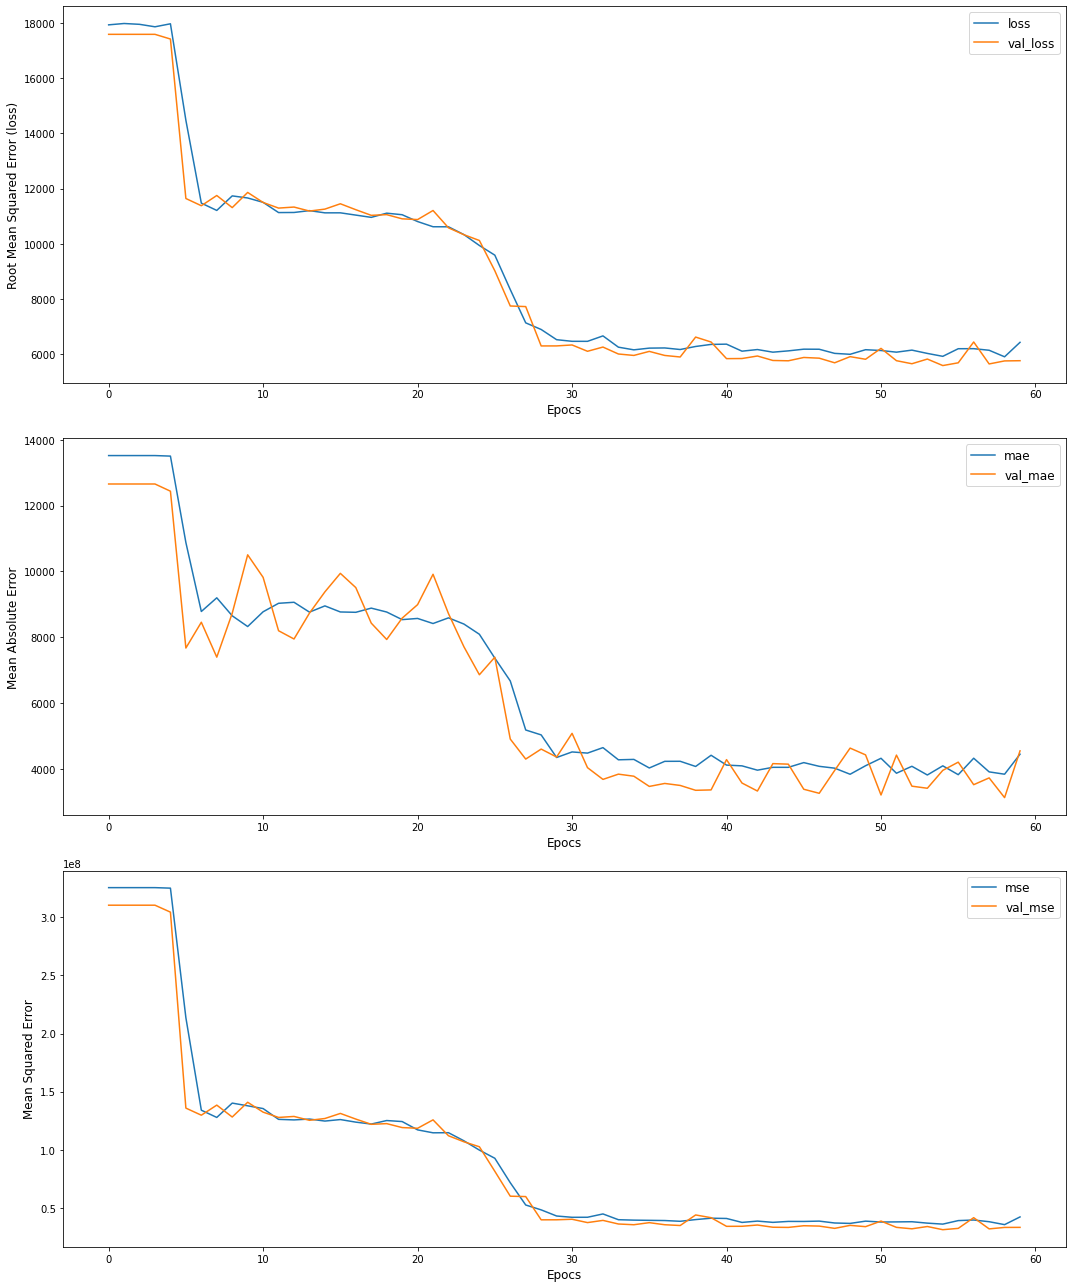

In [48]:
epoc_plots(history21)

In [36]:
y_pred21 = model21.predict(X_test)
r2_score(y_test, y_pred21) 

0.7885231067262453

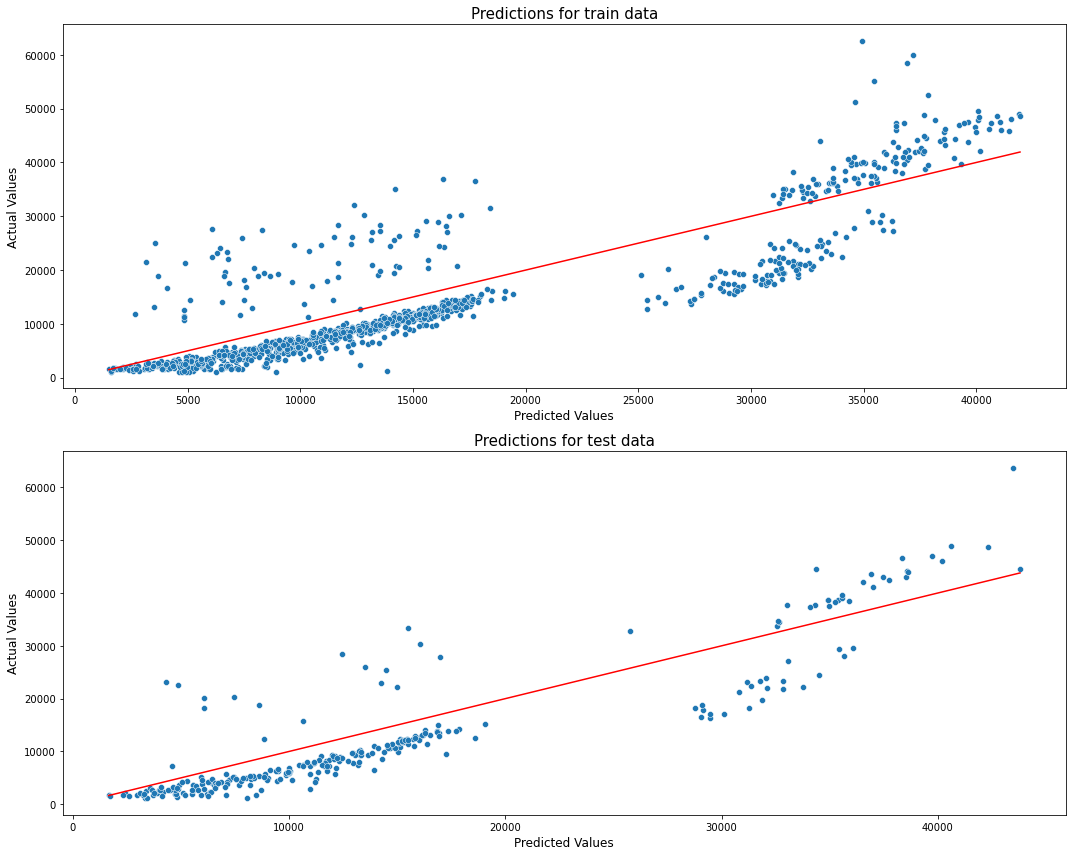

In [50]:
regression_plots(y_pred21, model21)

In [38]:
check_min_max(y_pred21)

Predicted values

max: 43808.0703125
min: 1651.995849609375

Actual values

max: 63770.42801
min: 1131.5066


In [52]:
# I've just noticed that the loss is higher than 4k
# whereas the best models until now have gotten the loss around 2.5k
# training the same model with the callback patience as 15  

In [41]:
# param count: 192,456
model22 = Sequential()

model22.add(Dense(200, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(5, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model22.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model22.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [42]:
history22 = model22.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 71ms/step - loss: 17910.9375 - mse: 325472256.0000 - mae: 13518.7100 - val_loss: 17593.4570 - val_mse: 310368416.0000 - val_mae: 12655.5635
Epoch 2/300
14/14 [==============================] - 0s 23ms/step - loss: 17994.3047 - mse: 325471872.0000 - mae: 13518.6953 - val_loss: 17593.4473 - val_mse: 310368000.0000 - val_mae: 12655.5469
Epoch 3/300
14/14 [==============================] - 0s 25ms/step - loss: 17904.7637 - mse: 325471328.0000 - mae: 13518.6777 - val_loss: 17593.4316 - val_mse: 310367520.0000 - val_mae: 12655.5283
Epoch 4/300
14/14 [==============================] - 0s 24ms/step - loss: 17970.4785 - mse: 325470848.0000 - mae: 13518.6572 - val_loss: 17593.4141 - val_mse: 310366944.0000 - val_mae: 12655.5039
Epoch 5/300
14/14 [==============================] - 0s 28ms/step - loss: 17949.4883 - mse: 325447072.0000 - mae: 13517.8203 - val_loss: 17583.6152 - val_mse: 310021760.0000 - val_mae: 12642.9814
Epoch 6/300
14/14 [=

Epoch 86/300
14/14 [==============================] - 0s 18ms/step - loss: 5478.9443 - mse: 30951122.0000 - mae: 3414.3032 - val_loss: 5387.9614 - val_mse: 29273416.0000 - val_mae: 3141.9456
Epoch 87/300
14/14 [==============================] - 0s 14ms/step - loss: 5447.0903 - mse: 30129908.0000 - mae: 3579.2798 - val_loss: 5064.0425 - val_mse: 25815394.0000 - val_mae: 2815.4067
Epoch 88/300
14/14 [==============================] - 0s 12ms/step - loss: 5477.0151 - mse: 31410726.0000 - mae: 3258.5000 - val_loss: 5230.1108 - val_mse: 27548956.0000 - val_mae: 3851.6172
Epoch 89/300
14/14 [==============================] - 0s 13ms/step - loss: 5511.1123 - mse: 31376612.0000 - mae: 3503.6665 - val_loss: 5338.8472 - val_mse: 28768204.0000 - val_mae: 2694.0012
Epoch 90/300
14/14 [==============================] - 0s 18ms/step - loss: 5423.2954 - mse: 29960396.0000 - mae: 3524.4497 - val_loss: 5196.1304 - val_mse: 27253634.0000 - val_mae: 2754.4988
Epoch 91/300
14/14 [=========================

Epoch 129/300
14/14 [==============================] - 0s 14ms/step - loss: 4796.0991 - mse: 24278366.0000 - mae: 2948.2856 - val_loss: 4642.4331 - val_mse: 21806932.0000 - val_mae: 2153.4631
Epoch 130/300
14/14 [==============================] - 0s 29ms/step - loss: 4919.3418 - mse: 24846958.0000 - mae: 2709.0522 - val_loss: 4484.2310 - val_mse: 20271214.0000 - val_mae: 2743.5413
Epoch 131/300
14/14 [==============================] - 0s 35ms/step - loss: 4812.3433 - mse: 24435860.0000 - mae: 2811.9900 - val_loss: 4599.2607 - val_mse: 21447460.0000 - val_mae: 2259.9062
Epoch 132/300
14/14 [==============================] - 0s 36ms/step - loss: 4792.0161 - mse: 24088334.0000 - mae: 2847.0366 - val_loss: 4847.3267 - val_mse: 23794630.0000 - val_mae: 2202.7007
Epoch 133/300
14/14 [==============================] - 0s 29ms/step - loss: 4847.2173 - mse: 24731732.0000 - mae: 2837.7107 - val_loss: 4519.0015 - val_mse: 20672608.0000 - val_mae: 2793.5093
Epoch 134/300
14/14 [===================

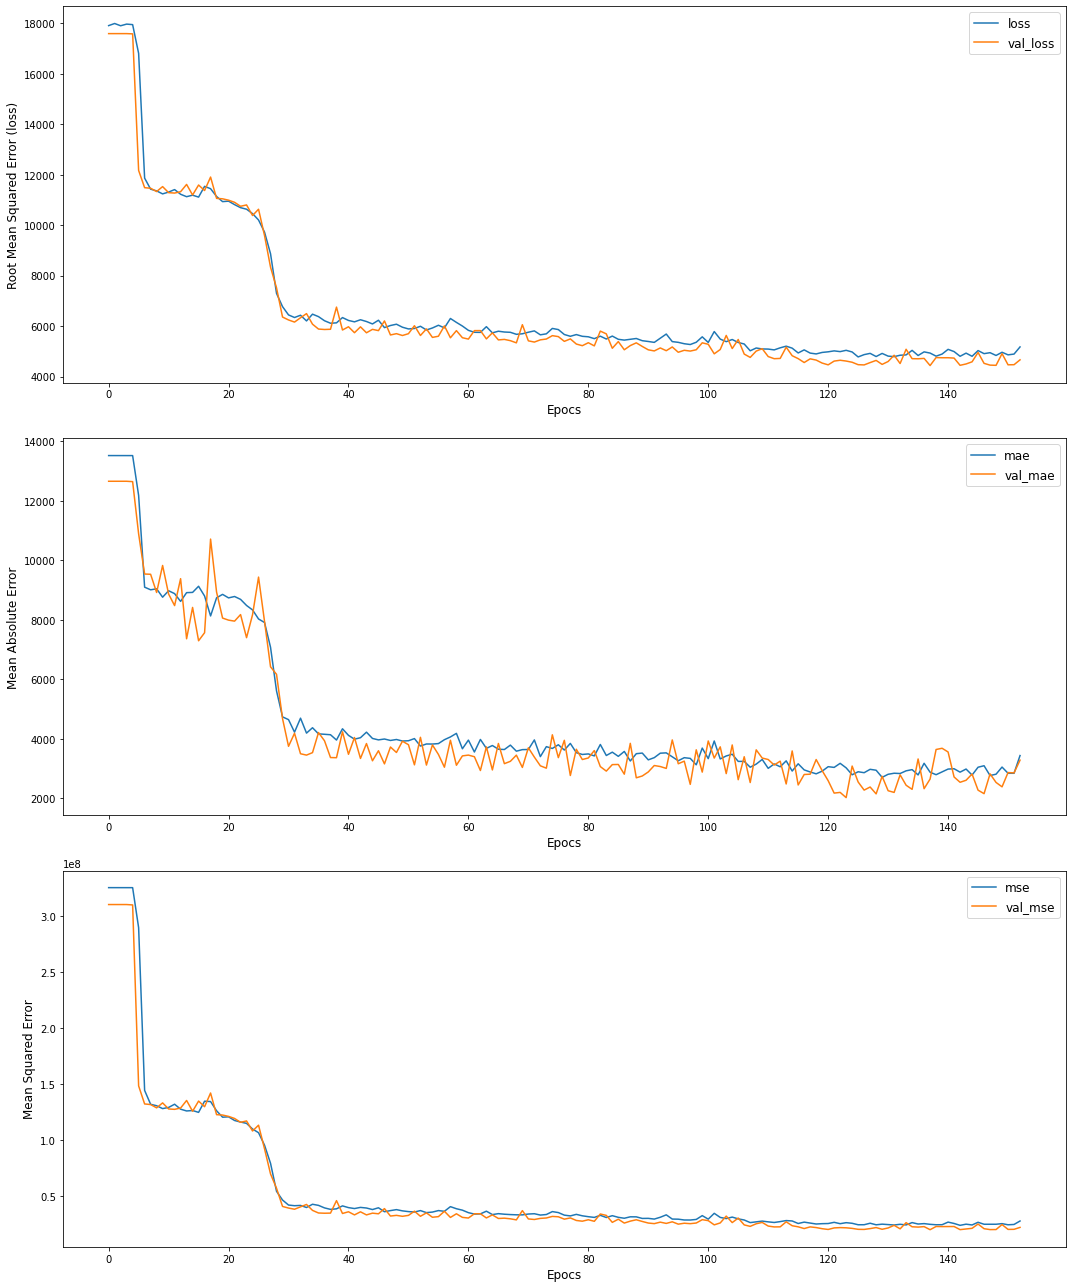

In [47]:
epoc_plots(history22)

In [44]:
y_pred22 = model22.predict(X_test)
r2_score(y_test, y_pred22) 

0.8610061339038138

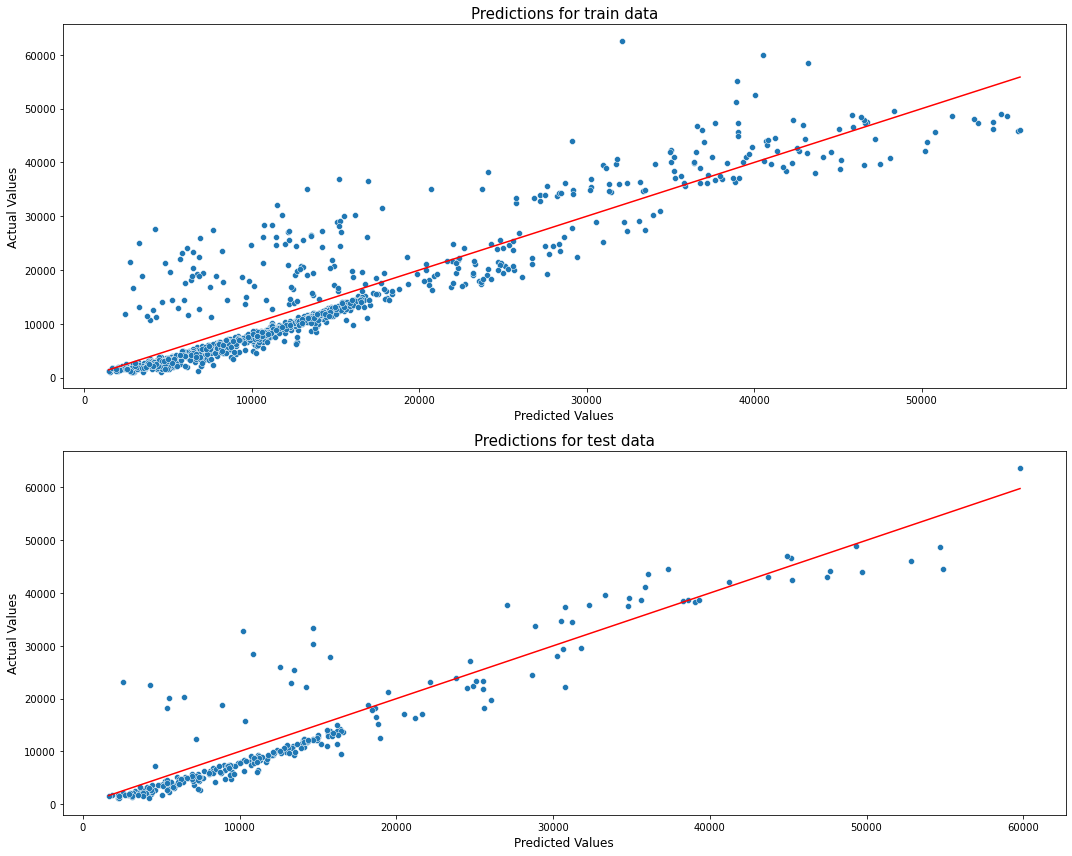

In [51]:
regression_plots(y_pred22, model22)

In [53]:
check_min_max(y_pred22)

Predicted values

max: 59788.20703125
min: 1644.345703125

Actual values

max: 63770.42801
min: 1131.5066


In [55]:
# huh!
# letting the model train for few more epocs increased the performace a lot
# makes me wonder what will happen if I let the models in the last notebook run for more epocs
# model22 has 192,456 params (check model.summary())
# lets try a deeper NN with similar params

In [60]:
# param count: 136,851
model23 = Sequential() 

model23.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model23.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model23.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model23.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model23.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model23.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [62]:
history23 = model23.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 99ms/step - loss: 17968.8320 - mse: 325472224.0000 - mae: 13518.7080 - val_loss: 17593.4512 - val_mse: 310368256.0000 - val_mae: 12655.5576
Epoch 2/300
14/14 [==============================] - 0s 17ms/step - loss: 17958.4551 - mse: 325471520.0000 - mae: 13518.6855 - val_loss: 17593.4316 - val_mse: 310367520.0000 - val_mae: 12655.5254
Epoch 3/300
14/14 [==============================] - 0s 24ms/step - loss: 18003.1758 - mse: 325470528.0000 - mae: 13518.6475 - val_loss: 17593.3965 - val_mse: 310366240.0000 - val_mae: 12655.4766
Epoch 4/300
14/14 [==============================] - 0s 29ms/step - loss: 17942.3203 - mse: 325468544.0000 - mae: 13518.5732 - val_loss: 17593.3125 - val_mse: 310363296.0000 - val_mae: 12655.3623
Epoch 5/300
14/14 [==============================] - 1s 37ms/step - loss: 17904.0586 - mse: 325463040.0000 - mae: 13518.3711 - val_loss: 17593.0254 - val_mse: 310353184.0000 - val_mae: 12654.9600
Epoch 6/300
14/14 [=

Epoch 86/300
14/14 [==============================] - 0s 19ms/step - loss: 4950.6519 - mse: 25203674.0000 - mae: 3217.8557 - val_loss: 4989.1284 - val_mse: 25267290.0000 - val_mae: 2450.3274
Epoch 87/300
14/14 [==============================] - 0s 16ms/step - loss: 5104.0479 - mse: 26847818.0000 - mae: 3196.6265 - val_loss: 4881.1089 - val_mse: 24258172.0000 - val_mae: 2439.6206
Epoch 88/300
14/14 [==============================] - 0s 17ms/step - loss: 5149.4146 - mse: 27490636.0000 - mae: 3104.2268 - val_loss: 6161.2119 - val_mse: 38389776.0000 - val_mae: 3211.0837
Epoch 89/300
14/14 [==============================] - 0s 17ms/step - loss: 5428.2280 - mse: 30326540.0000 - mae: 3531.1665 - val_loss: 6785.0835 - val_mse: 46457492.0000 - val_mae: 3745.0029
Epoch 90/300
14/14 [==============================] - 0s 14ms/step - loss: 5804.2202 - mse: 35013812.0000 - mae: 3725.8469 - val_loss: 4771.9741 - val_mse: 22973124.0000 - val_mae: 3201.0979
Epoch 91/300
14/14 [=========================

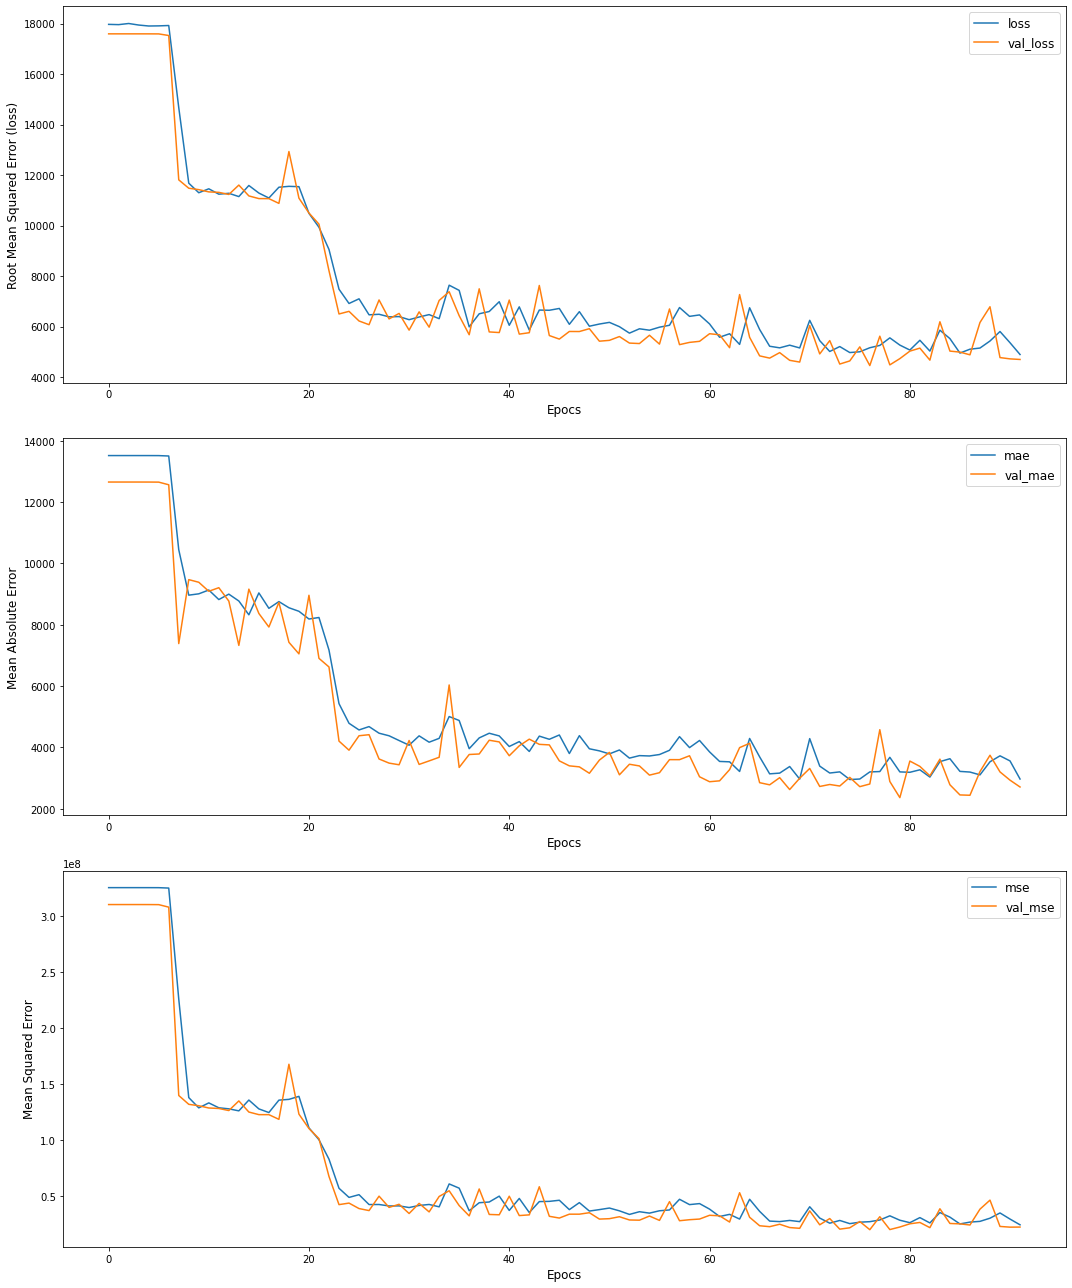

In [63]:
epoc_plots(history23)

In [64]:
y_pred23 = model23.predict(X_test)
r2_score(y_test, y_pred23) 

0.8641956092347544

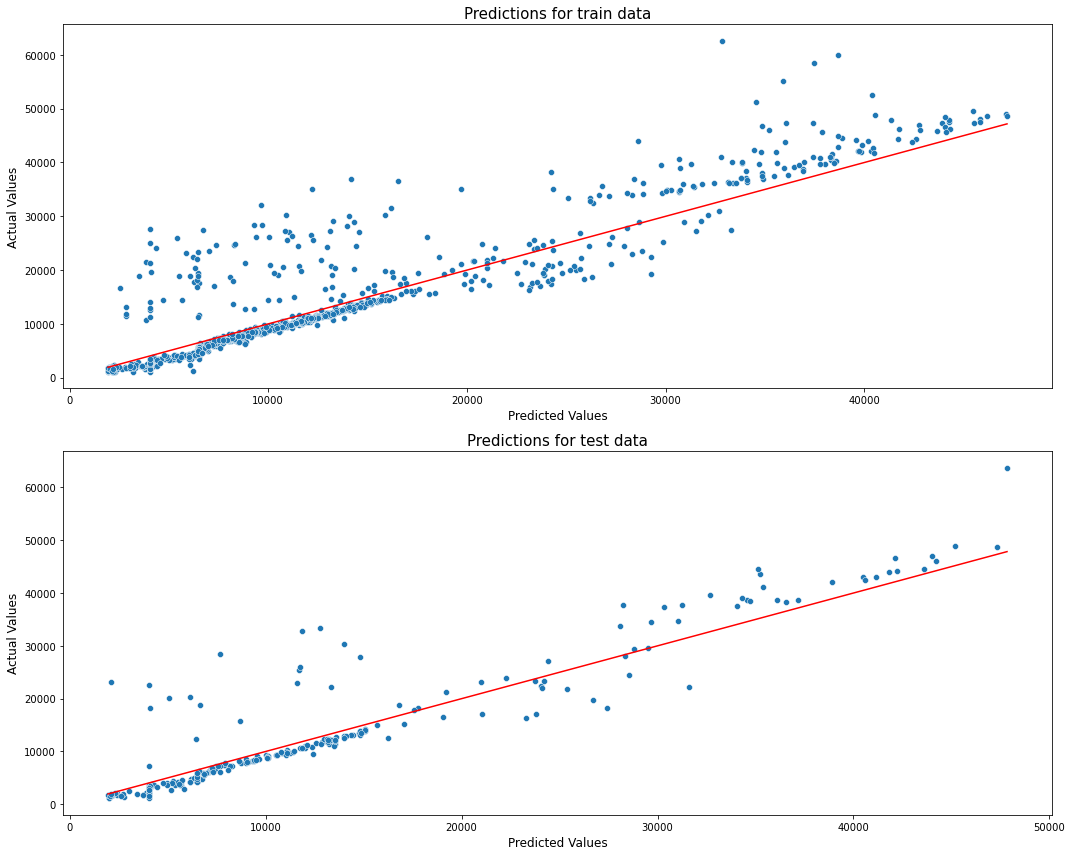

In [65]:
regression_plots(y_pred23, model23)

In [66]:
check_min_max(y_pred23)

Predicted values

max: 47844.0625
min: 1944.7132568359375

Actual values

max: 63770.42801
min: 1131.5066


In [67]:
# slightly better r2 score with less num of params
# but the max prediction value decresed 
# testing with adding more layers to the NN arch  

In [68]:
# param count: 194,476
model24 = Sequential() 

model24.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model24.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model24.add(Dense(75, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model24.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model24.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model24.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model24.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [70]:
history24 = model24.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 2s 111ms/step - loss: 17900.4570 - mse: 325472128.0000 - mae: 13518.7041 - val_loss: 17593.4492 - val_mse: 310368096.0000 - val_mae: 12655.5518
Epoch 2/300
14/14 [==============================] - 0s 25ms/step - loss: 17982.1113 - mse: 325471232.0000 - mae: 13518.6709 - val_loss: 17593.4141 - val_mse: 310366912.0000 - val_mae: 12655.5020
Epoch 3/300
14/14 [==============================] - 0s 22ms/step - loss: 17975.5820 - mse: 325469312.0000 - mae: 13518.6016 - val_loss: 17593.3359 - val_mse: 310364064.0000 - val_mae: 12655.3926
Epoch 4/300
14/14 [==============================] - 0s 26ms/step - loss: 17868.5332 - mse: 325464448.0000 - mae: 13518.4160 - val_loss: 17593.0918 - val_mse: 310355552.0000 - val_mae: 12655.0547
Epoch 5/300
14/14 [==============================] - 0s 27ms/step - loss: 17902.6055 - mse: 325445984.0000 - mae: 13517.7578 - val_loss: 17592.1035 - val_mse: 310320736.0000 - val_mae: 12653.6797
Epoch 6/300
14/14 [

Epoch 86/300
14/14 [==============================] - 0s 17ms/step - loss: 4898.1230 - mse: 24748410.0000 - mae: 2912.4341 - val_loss: 4765.4565 - val_mse: 23032974.0000 - val_mae: 2932.7817
Epoch 87/300
14/14 [==============================] - 0s 22ms/step - loss: 4892.9590 - mse: 24602526.0000 - mae: 3024.8418 - val_loss: 5661.8721 - val_mse: 32518072.0000 - val_mae: 3003.3901
Epoch 88/300
14/14 [==============================] - 0s 25ms/step - loss: 5374.3105 - mse: 29450414.0000 - mae: 3198.0210 - val_loss: 4942.1201 - val_mse: 24859156.0000 - val_mae: 2950.8193
Epoch 89/300
14/14 [==============================] - 0s 22ms/step - loss: 5158.1729 - mse: 27310826.0000 - mae: 3185.4065 - val_loss: 4498.6738 - val_mse: 20486758.0000 - val_mae: 2679.6472
Epoch 90/300
14/14 [==============================] - 0s 18ms/step - loss: 4804.3833 - mse: 24251744.0000 - mae: 2784.4512 - val_loss: 4552.0591 - val_mse: 20946174.0000 - val_mae: 3082.4355
Epoch 91/300
14/14 [=========================

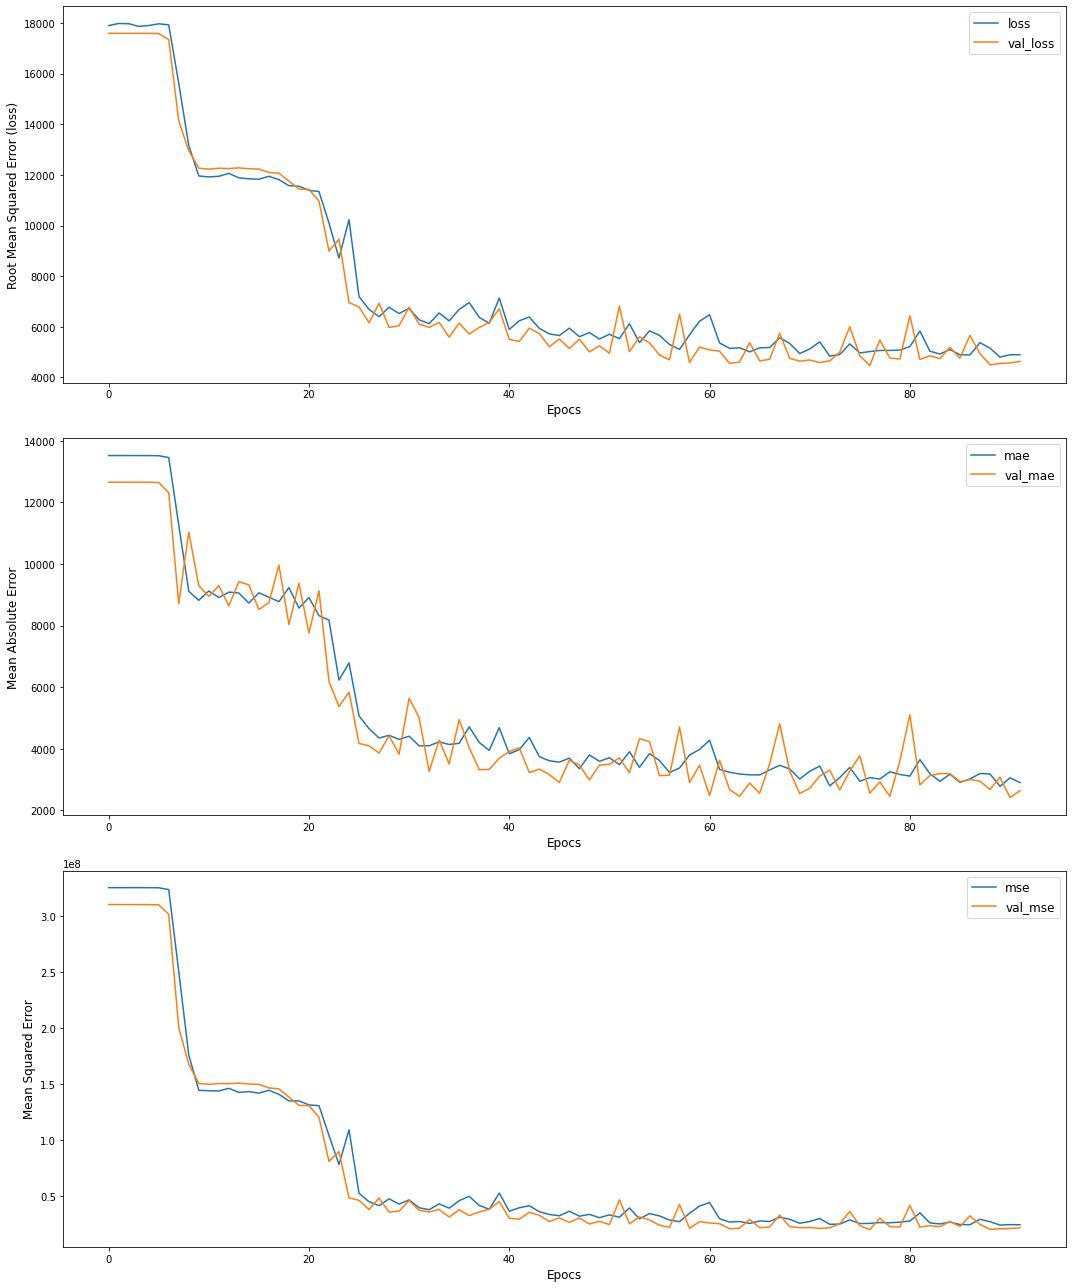

In [71]:
epoc_plots(history24)

In [72]:
y_pred24 = model24.predict(X_test)
r2_score(y_test, y_pred24) 

0.8655895601061626

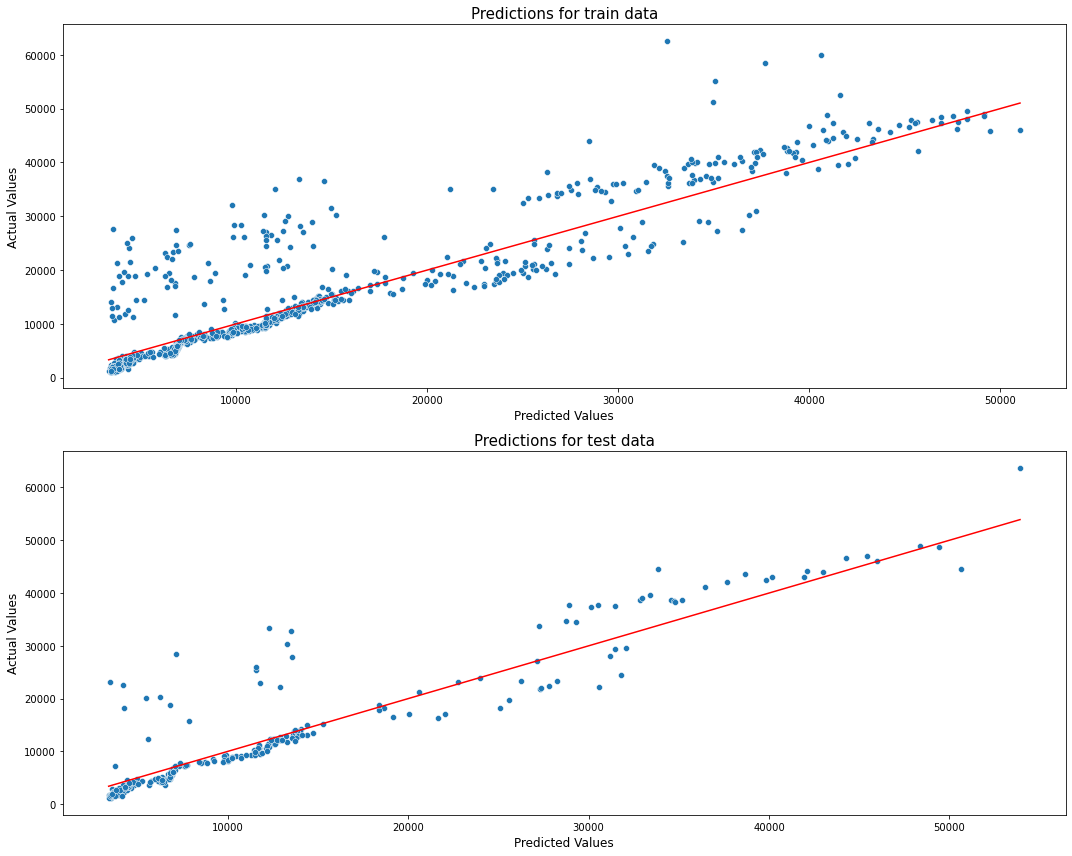

In [73]:
regression_plots(y_pred24, model24)

In [74]:
check_min_max(y_pred24)

Predicted values

max: 53908.70703125
min: 3409.61669921875

Actual values

max: 63770.42801
min: 1131.5066


In [75]:
# again, slight improvement in R2 score
# but max value increased by a lot (still less than model22 though)
# I feel like the number of neurons per layer is not that important
# when compared to the number of layers itself

In [82]:
# param count: 202,801
model25 = Sequential() 

model25.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model25.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model25.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model25.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [84]:
history25 = model25.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 63ms/step - loss: 17948.6816 - mse: 325471712.0000 - mae: 13518.6895 - val_loss: 17593.4023 - val_mse: 310366464.0000 - val_mae: 12655.4863
Epoch 2/300
14/14 [==============================] - 0s 34ms/step - loss: 17749.0781 - mse: 325460320.0000 - mae: 13518.2861 - val_loss: 17591.9453 - val_mse: 310315200.0000 - val_mae: 12653.4678
Epoch 3/300
14/14 [==============================] - 0s 28ms/step - loss: 17671.5332 - mse: 314450208.0000 - mae: 13109.6660 - val_loss: 12555.3711 - val_mse: 158149648.0000 - val_mae: 7294.8413
Epoch 4/300
14/14 [==============================] - 0s 27ms/step - loss: 11974.6953 - mse: 144618864.0000 - mae: 9233.7363 - val_loss: 11728.0850 - val_mse: 137945872.0000 - val_mae: 7645.0605
Epoch 5/300
14/14 [==============================] - 0s 22ms/step - loss: 11769.5479 - mse: 140541792.0000 - mae: 8702.0381 - val_loss: 11648.4541 - val_mse: 136069376.0000 - val_mae: 7706.5679
Epoch 6/300
14/14 [======

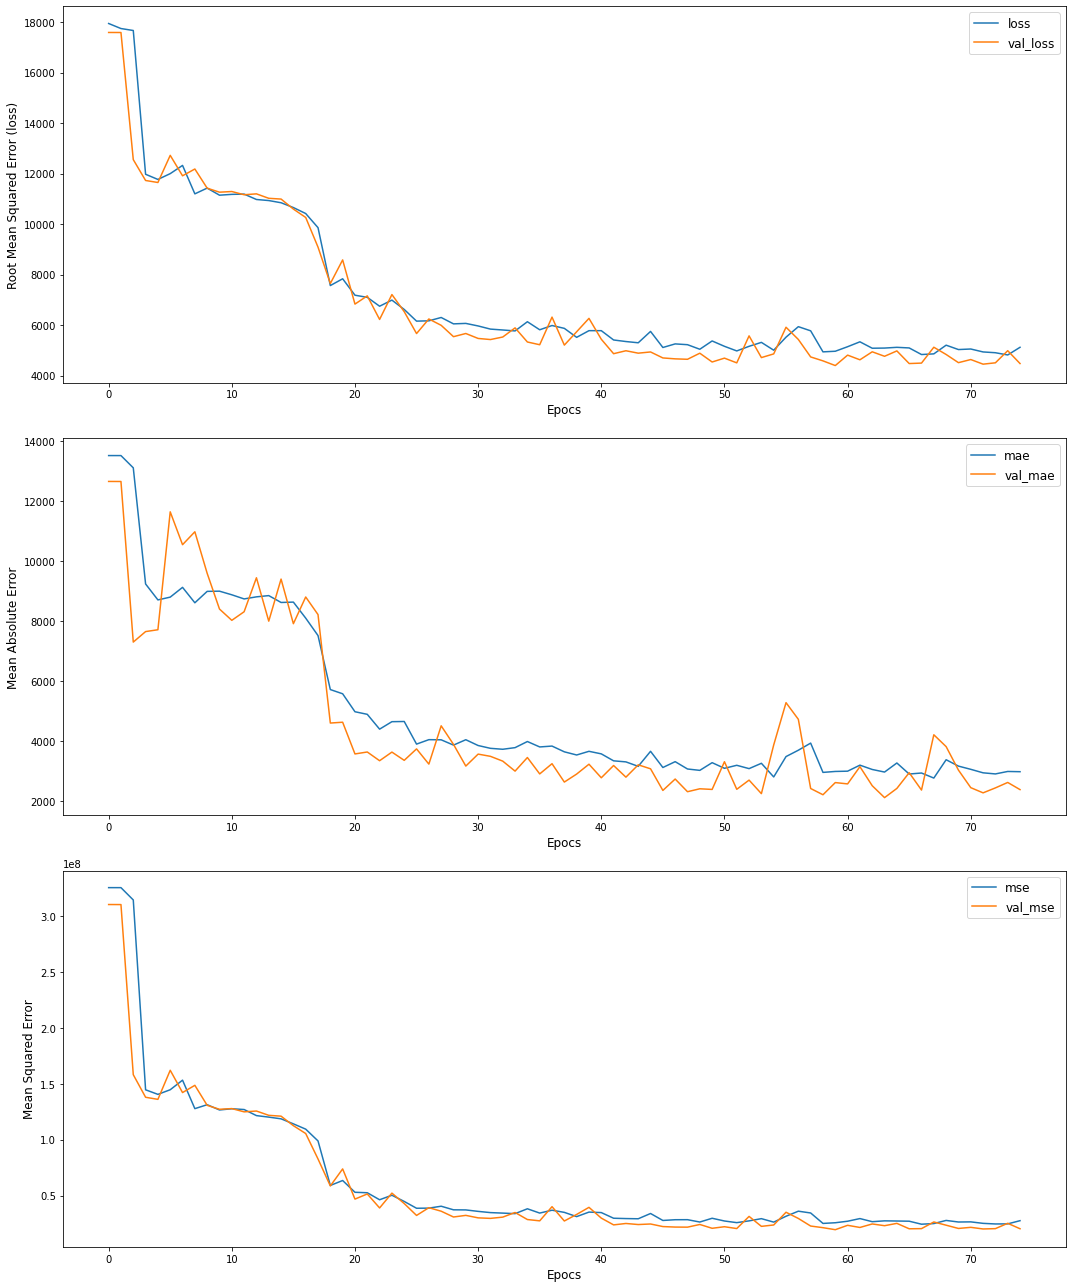

In [85]:
epoc_plots(history25)

In [86]:
y_pred25 = model25.predict(X_test)
r2_score(y_test, y_pred25) 

0.8710311378838521

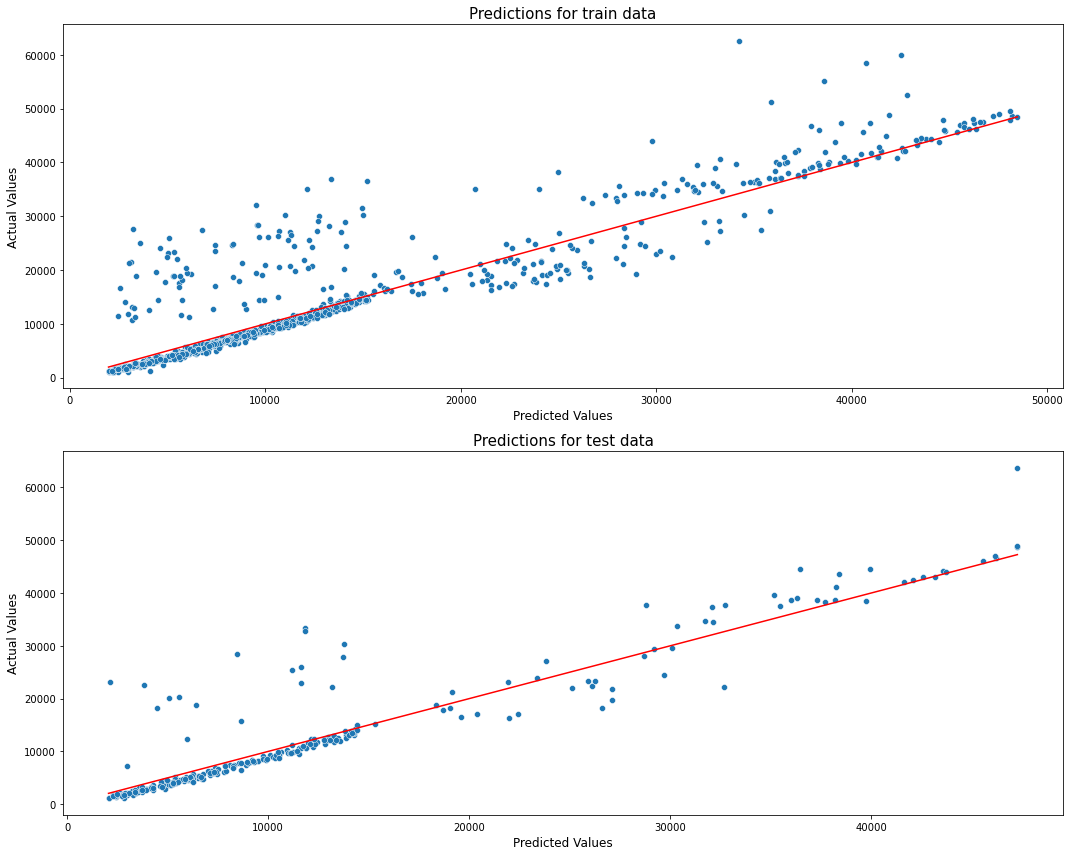

In [87]:
regression_plots(y_pred25, model25)

In [88]:
check_min_max(y_pred25)

Predicted values

max: 47279.13671875
min: 2060.682861328125

Actual values

max: 63770.42801
min: 1131.5066


In [89]:
# R2 improved a bit
# but the max value decresed to 47k from 53.9k
# but it seems like the number of layers is a better improver of performance 
# what if I decrease the neuron count even more, and increase the layer count
# lets try that next

In [104]:
# param count: 102,401
model26 = Sequential() 

model26.add(Dense(50, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(40):
    model26.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model26.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model26.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [106]:
history26 = model26.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 85ms/step - loss: 17968.0117 - mse: 325472064.0000 - mae: 13518.7021 - val_loss: 17593.4414 - val_mse: 310367840.0000 - val_mae: 12655.5420
Epoch 2/300
14/14 [==============================] - 0s 21ms/step - loss: 17962.8594 - mse: 325470464.0000 - mae: 13518.6436 - val_loss: 17593.3613 - val_mse: 310365056.0000 - val_mae: 12655.4326
Epoch 3/300
14/14 [==============================] - 0s 18ms/step - loss: 17943.5508 - mse: 325462912.0000 - mae: 13518.3672 - val_loss: 17592.7910 - val_mse: 310344928.0000 - val_mae: 12654.6357
Epoch 4/300
14/14 [==============================] - 0s 20ms/step - loss: 17871.5000 - mse: 325351904.0000 - mae: 13514.2363 - val_loss: 17579.6543 - val_mse: 309882656.0000 - val_mae: 12636.3574
Epoch 5/300
14/14 [==============================] - 0s 19ms/step - loss: 17843.0137 - mse: 320458976.0000 - mae: 13332.9150 - val_loss: 16825.0605 - val_mse: 283905856.0000 - val_mae: 11562.9004
Epoch 6/300
14/14 [=

Epoch 43/300
14/14 [==============================] - 0s 34ms/step - loss: 11912.9600 - mse: 143397232.0000 - mae: 8777.1982 - val_loss: 12557.3945 - val_mse: 157806608.0000 - val_mae: 10209.4092
Epoch 44/300
14/14 [==============================] - 0s 29ms/step - loss: 11908.5557 - mse: 143614368.0000 - mae: 9148.4961 - val_loss: 12310.3398 - val_mse: 151898480.0000 - val_mae: 8508.7373
Epoch 45/300
14/14 [==============================] - 0s 16ms/step - loss: 12042.6240 - mse: 146533536.0000 - mae: 8904.5977 - val_loss: 12317.5459 - val_mse: 152079408.0000 - val_mae: 8497.2012
Epoch 46/300
14/14 [==============================] - 0s 16ms/step - loss: 11935.5010 - mse: 143813024.0000 - mae: 9002.3135 - val_loss: 12291.1621 - val_mse: 151276272.0000 - val_mae: 9349.9414
Epoch 47/300
14/14 [==============================] - 0s 17ms/step - loss: 11992.8311 - mse: 145681296.0000 - mae: 9172.6836 - val_loss: 12246.8877 - val_mse: 150239952.0000 - val_mae: 9005.0156
Epoch 48/300
14/14 [====

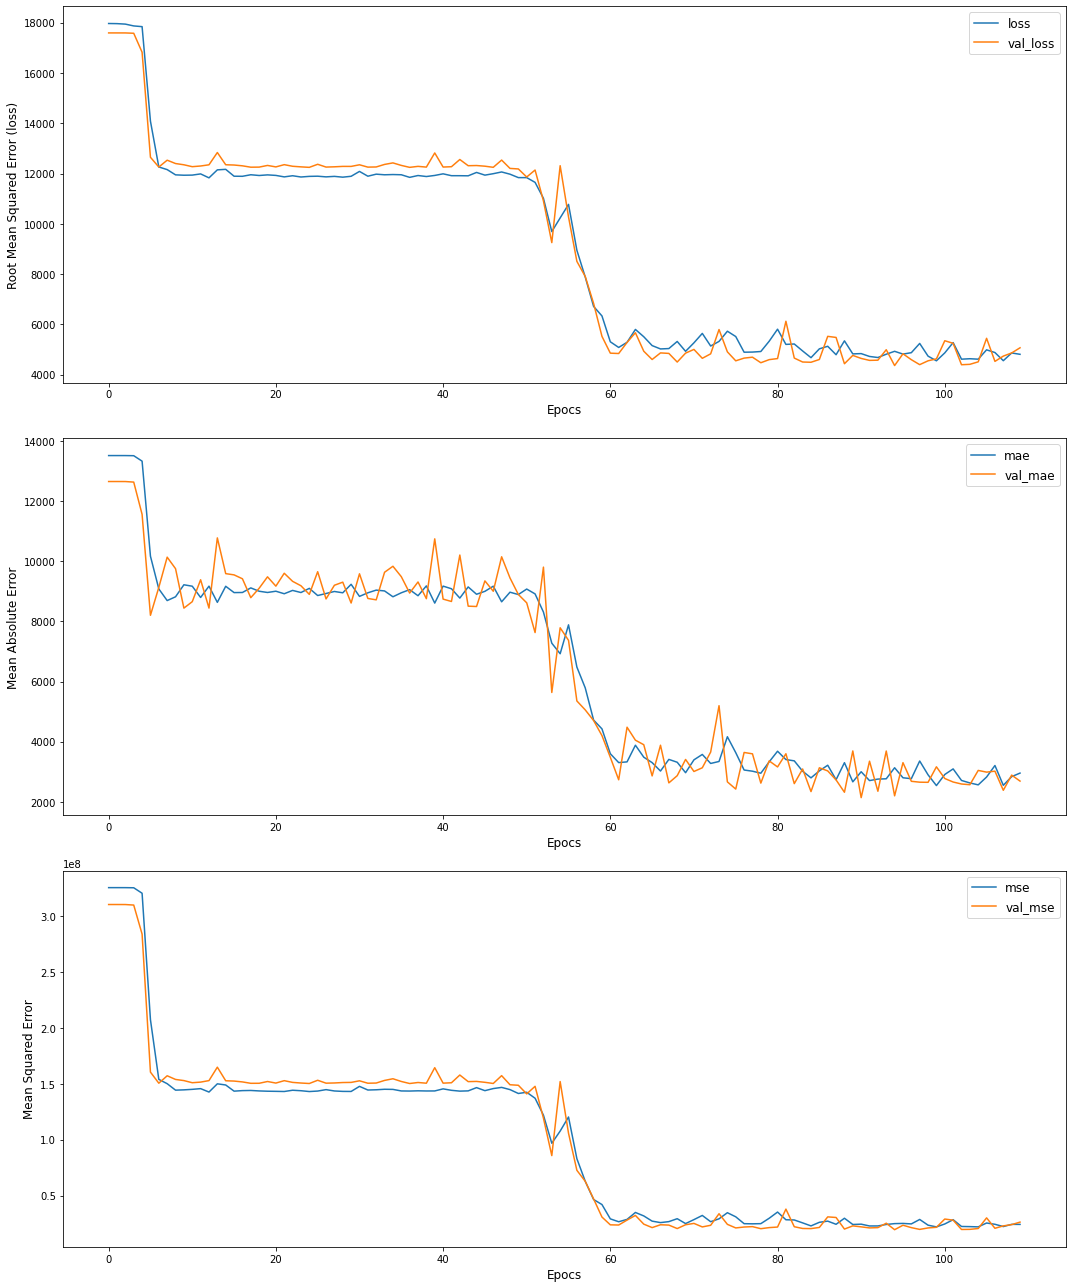

In [107]:
epoc_plots(history26)

In [108]:
y_pred26 = model26.predict(X_test)
r2_score(y_test, y_pred26) 

0.8450412691771877

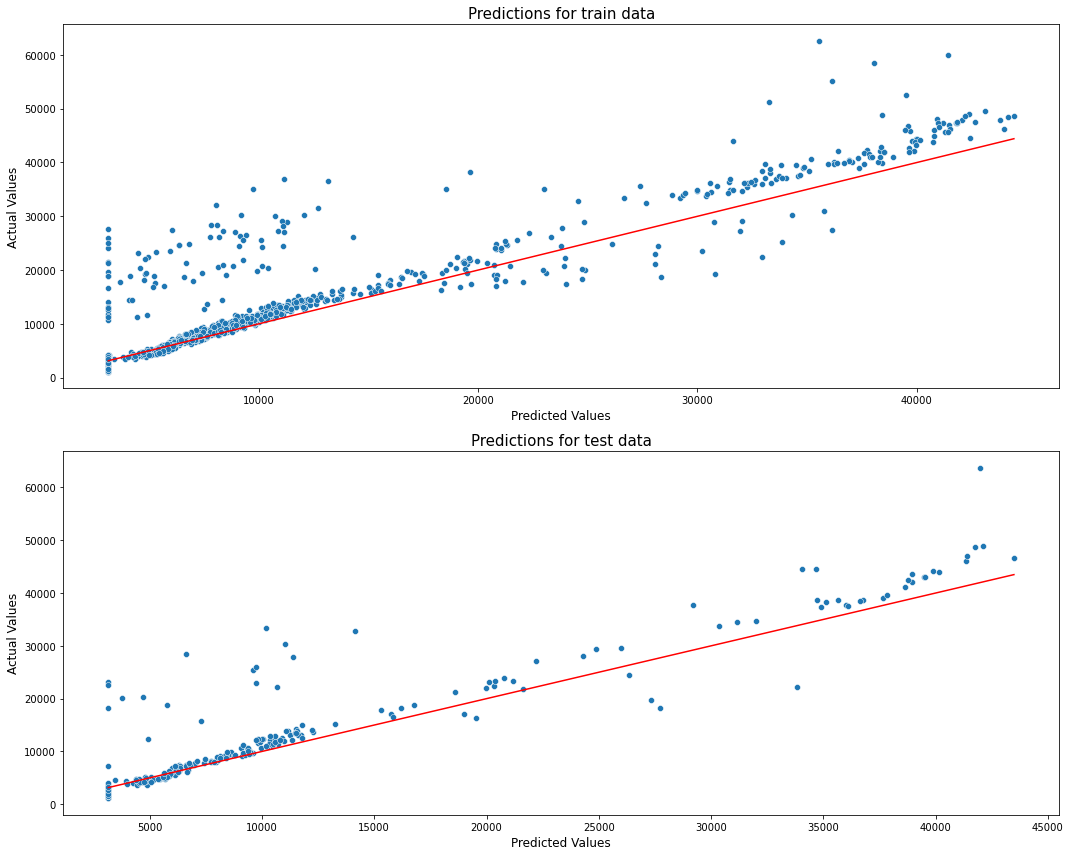

In [109]:
regression_plots(y_pred26, model26)

In [110]:
check_min_max(y_pred26)

Predicted values

max: 43488.9921875
min: 3157.331787109375

Actual values

max: 63770.42801
min: 1131.5066


In [111]:
# lower R2, lower max value 
# but it had half the number of params as the last few models 
# lets increase the param count and try again

In [152]:
# also I had to decrease the learning rate for the next model to start learning 

In [129]:
# param count: 206,251
model27 = Sequential() 

model27.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model27.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(40):
    model27.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model27.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model27.compile(loss=root_mean_squared_error, optimizer=Adam(0.0001),
             metrics=['mse', 'mae'])

In [130]:
history27 = model27.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 98ms/step - loss: 17956.3105 - mse: 325472416.0000 - mae: 13518.7148 - val_loss: 17593.4668 - val_mse: 310368736.0000 - val_mae: 12655.5762
Epoch 2/300
14/14 [==============================] - 0s 24ms/step - loss: 17986.6348 - mse: 325472320.0000 - mae: 13518.7139 - val_loss: 17593.4629 - val_mse: 310368640.0000 - val_mae: 12655.5723
Epoch 3/300
14/14 [==============================] - 0s 32ms/step - loss: 17923.6270 - mse: 325472256.0000 - mae: 13518.7090 - val_loss: 17593.4629 - val_mse: 310368608.0000 - val_mae: 12655.5703
Epoch 4/300
14/14 [==============================] - 0s 32ms/step - loss: 17969.0156 - mse: 325472192.0000 - mae: 13518.7070 - val_loss: 17593.4609 - val_mse: 310368480.0000 - val_mae: 12655.5654
Epoch 5/300
14/14 [==============================] - 0s 29ms/step - loss: 17903.0547 - mse: 325472032.0000 - mae: 13518.7021 - val_loss: 17593.4551 - val_mse: 310368352.0000 - val_mae: 12655.5596
Epoch 6/300
14/14 [=

Epoch 43/300
14/14 [==============================] - 0s 18ms/step - loss: 11940.5303 - mse: 143327920.0000 - mae: 9224.3369 - val_loss: 12294.2100 - val_mse: 151349328.0000 - val_mae: 9364.7969
Epoch 44/300
14/14 [==============================] - 0s 17ms/step - loss: 11889.4561 - mse: 143352320.0000 - mae: 8868.6230 - val_loss: 12253.1777 - val_mse: 150380192.0000 - val_mae: 9089.6475
Epoch 45/300
14/14 [==============================] - 0s 18ms/step - loss: 11863.4189 - mse: 143036448.0000 - mae: 8905.6709 - val_loss: 12255.7725 - val_mse: 150439712.0000 - val_mae: 9115.6172
Epoch 46/300
14/14 [==============================] - 0s 18ms/step - loss: 11870.6387 - mse: 142809712.0000 - mae: 9003.9346 - val_loss: 12279.5586 - val_mse: 150998288.0000 - val_mae: 9294.2227
Epoch 47/300
14/14 [==============================] - 0s 17ms/step - loss: 11815.1562 - mse: 142726816.0000 - mae: 8955.0908 - val_loss: 12235.6318 - val_mse: 149939568.0000 - val_mae: 9146.4834
Epoch 48/300
14/14 [=====

Epoch 128/300
14/14 [==============================] - 0s 18ms/step - loss: 5891.6787 - mse: 35166040.0000 - mae: 3930.9060 - val_loss: 5763.6875 - val_mse: 33491590.0000 - val_mae: 3568.0630
Epoch 129/300
14/14 [==============================] - 0s 18ms/step - loss: 5713.8013 - mse: 33081616.0000 - mae: 3738.0947 - val_loss: 5530.6289 - val_mse: 30783826.0000 - val_mae: 3604.5120
Epoch 130/300
14/14 [==============================] - 0s 18ms/step - loss: 5643.4111 - mse: 32962366.0000 - mae: 3718.1294 - val_loss: 5571.8174 - val_mse: 31221930.0000 - val_mae: 3822.9863
Epoch 131/300
14/14 [==============================] - 0s 17ms/step - loss: 5654.1729 - mse: 32882054.0000 - mae: 3761.3174 - val_loss: 5647.8193 - val_mse: 32027462.0000 - val_mae: 3969.8057
Epoch 132/300
14/14 [==============================] - 0s 17ms/step - loss: 5709.7847 - mse: 33718016.0000 - mae: 3681.1023 - val_loss: 5519.0137 - val_mse: 30644580.0000 - val_mae: 3646.0771
Epoch 133/300
14/14 [===================

Epoch 171/300
14/14 [==============================] - 0s 18ms/step - loss: 5571.8662 - mse: 31559330.0000 - mae: 3734.3289 - val_loss: 5133.7549 - val_mse: 26703712.0000 - val_mae: 3367.3628
Epoch 172/300
14/14 [==============================] - 0s 17ms/step - loss: 5610.2207 - mse: 33244810.0000 - mae: 3618.0405 - val_loss: 6676.1841 - val_mse: 45011256.0000 - val_mae: 3896.2422
Epoch 173/300
14/14 [==============================] - 0s 18ms/step - loss: 5505.7280 - mse: 30893348.0000 - mae: 3640.1160 - val_loss: 5139.6304 - val_mse: 26737026.0000 - val_mae: 3518.5076
Epoch 174/300
14/14 [==============================] - 0s 18ms/step - loss: 5209.9678 - mse: 28195518.0000 - mae: 3489.5337 - val_loss: 5144.8999 - val_mse: 26870882.0000 - val_mae: 3267.0774
Epoch 175/300
14/14 [==============================] - 0s 17ms/step - loss: 5274.2764 - mse: 28387740.0000 - mae: 3428.4617 - val_loss: 5275.9888 - val_mse: 27993968.0000 - val_mae: 3783.3655
Epoch 176/300
14/14 [===================

Epoch 214/300
14/14 [==============================] - 0s 18ms/step - loss: 5026.8086 - mse: 26213398.0000 - mae: 3118.5073 - val_loss: 5495.1484 - val_mse: 30733956.0000 - val_mae: 3132.5225
Epoch 215/300
14/14 [==============================] - 0s 18ms/step - loss: 5328.7280 - mse: 28888658.0000 - mae: 3271.0720 - val_loss: 4840.0898 - val_mse: 23751842.0000 - val_mae: 3065.0371
Epoch 216/300
14/14 [==============================] - 0s 17ms/step - loss: 4987.1924 - mse: 25911128.0000 - mae: 3162.3203 - val_loss: 4970.7144 - val_mse: 25202624.0000 - val_mae: 2869.2336
Epoch 217/300
14/14 [==============================] - 0s 17ms/step - loss: 5039.1289 - mse: 26374036.0000 - mae: 3009.6372 - val_loss: 4816.9551 - val_mse: 23543222.0000 - val_mae: 3063.8096
Epoch 218/300
14/14 [==============================] - 0s 17ms/step - loss: 5072.9146 - mse: 26418224.0000 - mae: 3193.2932 - val_loss: 4997.5298 - val_mse: 25135322.0000 - val_mae: 3455.1042
Epoch 219/300
14/14 [===================

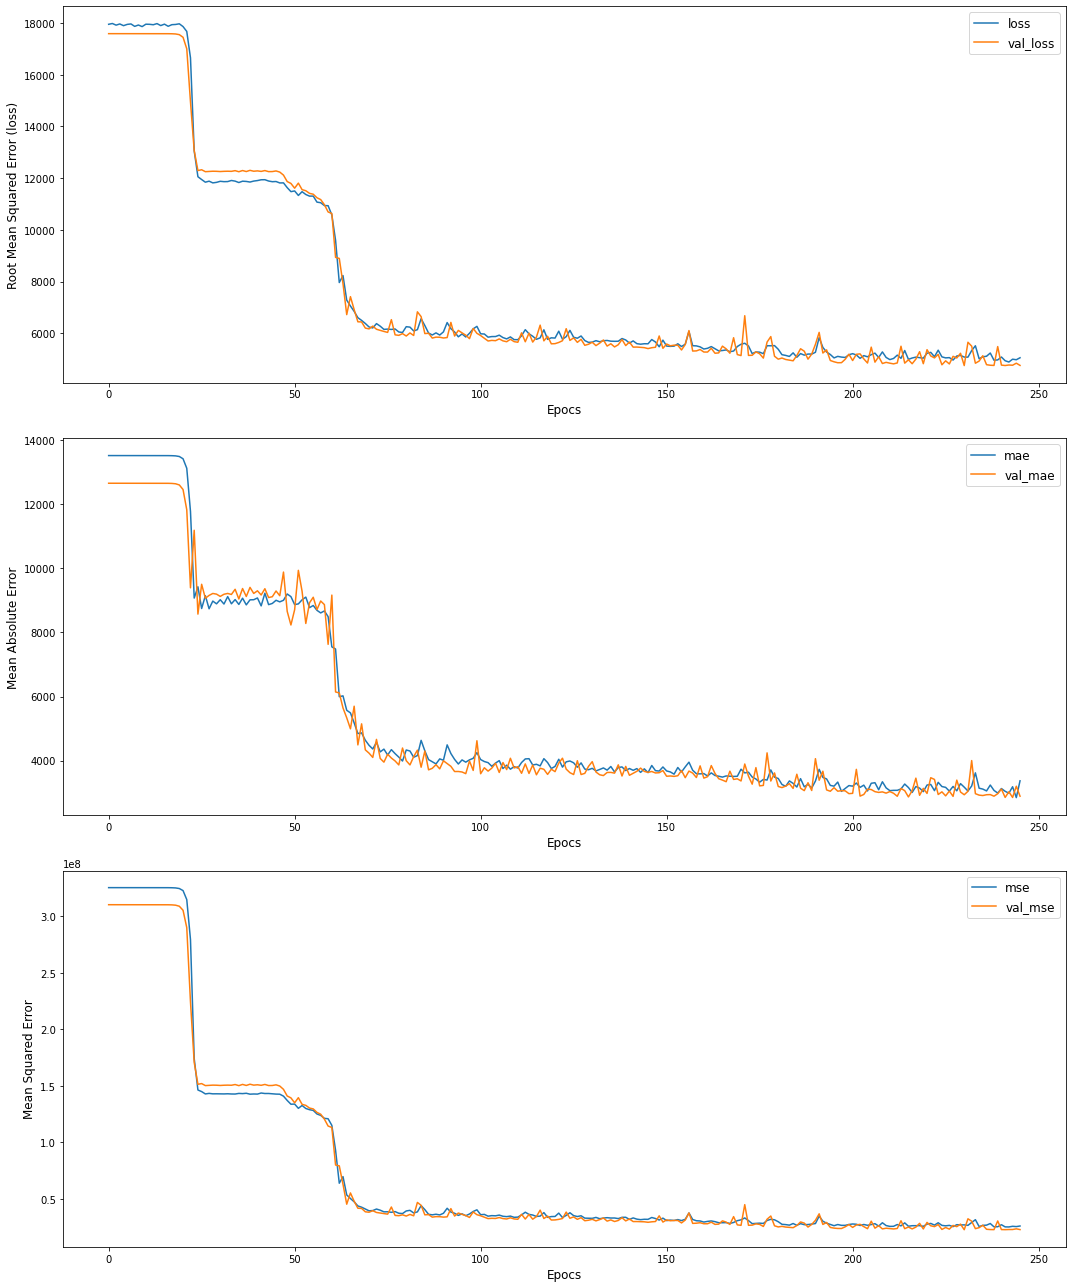

In [131]:
epoc_plots(history27)

In [132]:
y_pred27 = model27.predict(X_test)
r2_score(y_test, y_pred27) 

0.8620699978542132

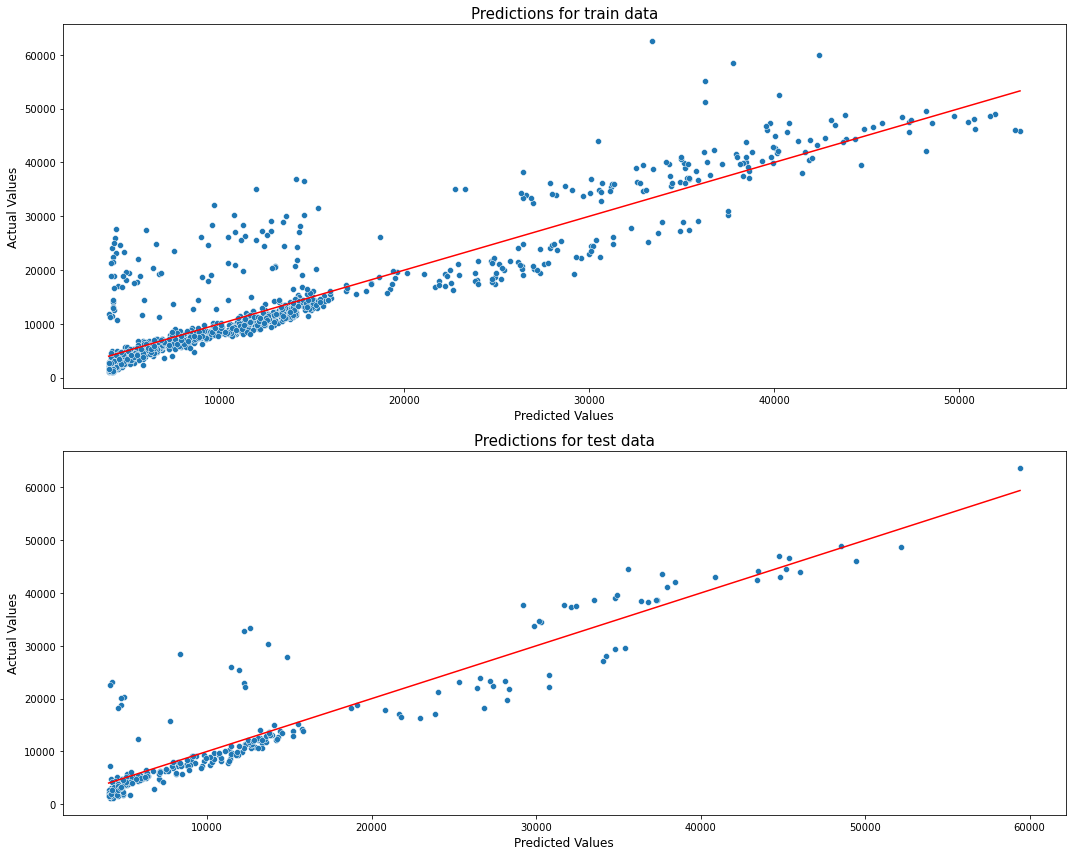

In [133]:
regression_plots(y_pred27, model27)

In [134]:
check_min_max(y_pred27)

Predicted values

max: 59420.78125
min: 4013.441162109375

Actual values

max: 63770.42801
min: 1131.5066


In [142]:
# the R2 value decresed a bit
# but the max value increased a lot
# it seems like the number of layers factors a lot more than 
# the individual neuron count per layer
# what if we increase the total param 
# lets try and double the total param count and see the results

In [169]:
# param count: 392,451
model28 = Sequential() 

model28.add(Dense(200, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(5):
    model28.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(10):
    model28.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model28.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model28.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model28.compile(loss=root_mean_squared_error, optimizer=Adam(0.0001),
             metrics=['mse', 'mae'])

In [170]:
history28 = model28.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 2s 171ms/step - loss: 17938.0000 - mse: 325472448.0000 - mae: 13518.7158 - val_loss: 17593.4668 - val_mse: 310368736.0000 - val_mae: 12655.5762
Epoch 2/300
14/14 [==============================] - 1s 45ms/step - loss: 17953.3789 - mse: 325472320.0000 - mae: 13518.7139 - val_loss: 17593.4629 - val_mse: 310368640.0000 - val_mae: 12655.5723
Epoch 3/300
14/14 [==============================] - 0s 35ms/step - loss: 17967.2051 - mse: 325472256.0000 - mae: 13518.7119 - val_loss: 17593.4629 - val_mse: 310368608.0000 - val_mae: 12655.5703
Epoch 4/300
14/14 [==============================] - 0s 34ms/step - loss: 17919.2891 - mse: 325472128.0000 - mae: 13518.7070 - val_loss: 17593.4590 - val_mse: 310368448.0000 - val_mae: 12655.5654
Epoch 5/300
14/14 [==============================] - 1s 46ms/step - loss: 17965.8105 - mse: 325472032.0000 - mae: 13518.7021 - val_loss: 17593.4551 - val_mse: 310368352.0000 - val_mae: 12655.5596
Epoch 6/300
14/14 [

Epoch 43/300
14/14 [==============================] - 0s 19ms/step - loss: 11525.2656 - mse: 133773448.0000 - mae: 9373.9746 - val_loss: 11681.1240 - val_mse: 136691952.0000 - val_mae: 8957.8721
Epoch 44/300
14/14 [==============================] - 0s 20ms/step - loss: 11451.5215 - mse: 132787104.0000 - mae: 9129.7305 - val_loss: 11646.2227 - val_mse: 135873520.0000 - val_mae: 9007.7217
Epoch 45/300
14/14 [==============================] - 0s 22ms/step - loss: 11425.3076 - mse: 131613792.0000 - mae: 9054.7285 - val_loss: 11681.9814 - val_mse: 136672208.0000 - val_mae: 9555.1621
Epoch 46/300
14/14 [==============================] - 0s 19ms/step - loss: 11412.4922 - mse: 132108496.0000 - mae: 8865.9756 - val_loss: 11798.3770 - val_mse: 139387504.0000 - val_mae: 9987.8320
Epoch 47/300
14/14 [==============================] - 0s 21ms/step - loss: 11475.3311 - mse: 133259120.0000 - mae: 9193.0781 - val_loss: 11613.4580 - val_mse: 135155584.0000 - val_mae: 8438.4805
Epoch 48/300
14/14 [=====

Epoch 128/300
14/14 [==============================] - 1s 53ms/step - loss: 5660.9336 - mse: 32607914.0000 - mae: 3784.1592 - val_loss: 5266.6011 - val_mse: 27882450.0000 - val_mae: 2918.6531
Epoch 129/300
14/14 [==============================] - 1s 40ms/step - loss: 5617.7710 - mse: 32152604.0000 - mae: 3364.3823 - val_loss: 5399.1934 - val_mse: 29314550.0000 - val_mae: 3042.1978
Epoch 130/300
14/14 [==============================] - 1s 39ms/step - loss: 5600.3896 - mse: 32289234.0000 - mae: 3740.0496 - val_loss: 5185.3740 - val_mse: 26976236.0000 - val_mae: 3331.4675
Epoch 131/300
14/14 [==============================] - 0s 24ms/step - loss: 5604.9468 - mse: 31782006.0000 - mae: 3488.7759 - val_loss: 5184.9839 - val_mse: 27004022.0000 - val_mae: 3244.2458
Epoch 132/300
14/14 [==============================] - 0s 23ms/step - loss: 5762.1670 - mse: 33974728.0000 - mae: 3786.4810 - val_loss: 5209.2349 - val_mse: 27280298.0000 - val_mae: 2920.0012
Epoch 133/300
14/14 [===================

Epoch 171/300
14/14 [==============================] - 1s 44ms/step - loss: 5406.4126 - mse: 29668574.0000 - mae: 3634.4124 - val_loss: 4903.3145 - val_mse: 24155342.0000 - val_mae: 3058.8318
Epoch 172/300
14/14 [==============================] - 1s 41ms/step - loss: 5471.1587 - mse: 30745726.0000 - mae: 3273.1189 - val_loss: 5086.3403 - val_mse: 26058656.0000 - val_mae: 2929.7500
Epoch 173/300
14/14 [==============================] - 0s 28ms/step - loss: 5350.4355 - mse: 29436706.0000 - mae: 3437.7693 - val_loss: 4911.8911 - val_mse: 24293588.0000 - val_mae: 2580.2439
Epoch 174/300
14/14 [==============================] - 1s 45ms/step - loss: 5387.8223 - mse: 29854412.0000 - mae: 3147.3328 - val_loss: 5017.2891 - val_mse: 25372962.0000 - val_mae: 2849.1714
Epoch 175/300
14/14 [==============================] - 1s 48ms/step - loss: 5574.8774 - mse: 31429372.0000 - mae: 3484.0776 - val_loss: 5004.9961 - val_mse: 25118810.0000 - val_mae: 3522.2056
Epoch 176/300
14/14 [===================

Epoch 214/300
14/14 [==============================] - 0s 20ms/step - loss: 5085.7793 - mse: 26367156.0000 - mae: 3157.8120 - val_loss: 4857.0981 - val_mse: 23844214.0000 - val_mae: 2716.2942
Epoch 215/300
14/14 [==============================] - 0s 20ms/step - loss: 5249.0942 - mse: 28117442.0000 - mae: 3090.2219 - val_loss: 4689.8516 - val_mse: 22151522.0000 - val_mae: 3143.2412
Epoch 216/300
14/14 [==============================] - 0s 18ms/step - loss: 5030.6104 - mse: 26297220.0000 - mae: 3275.6477 - val_loss: 4841.6089 - val_mse: 23704004.0000 - val_mae: 2386.3352
Epoch 217/300
14/14 [==============================] - 0s 22ms/step - loss: 5198.3667 - mse: 28103012.0000 - mae: 3264.5132 - val_loss: 5046.6255 - val_mse: 25518322.0000 - val_mae: 3342.5295
Epoch 218/300
14/14 [==============================] - 0s 20ms/step - loss: 5438.2505 - mse: 30036780.0000 - mae: 3310.1650 - val_loss: 4745.6279 - val_mse: 22717258.0000 - val_mae: 2908.2754
Epoch 219/300
14/14 [===================

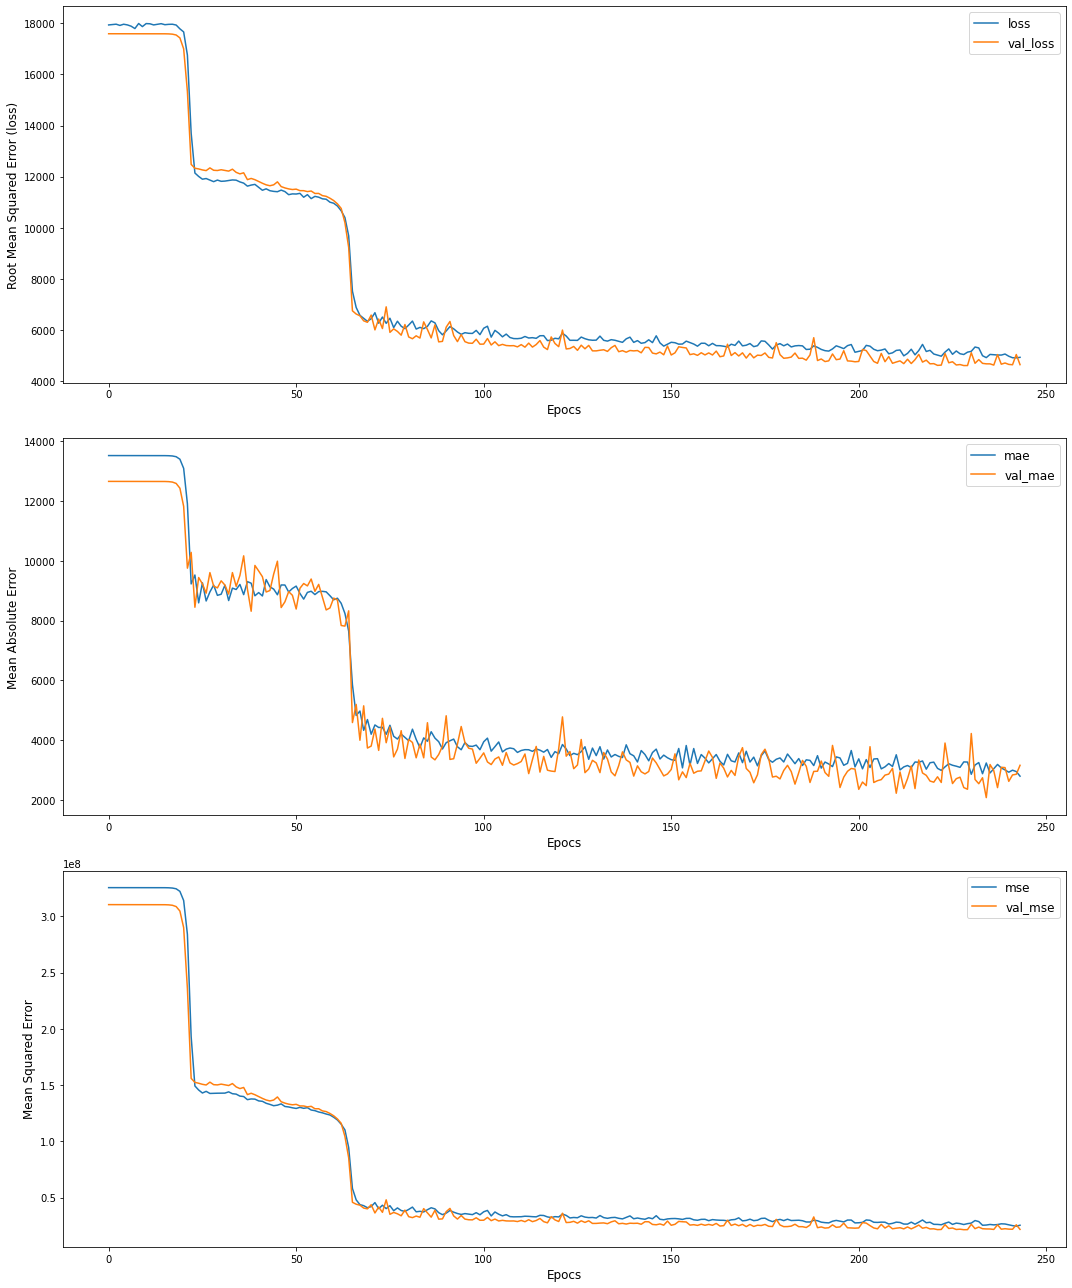

In [171]:
epoc_plots(history28)

In [172]:
y_pred28 = model28.predict(X_test)
r2_score(y_test, y_pred28) 

0.8583691627963227

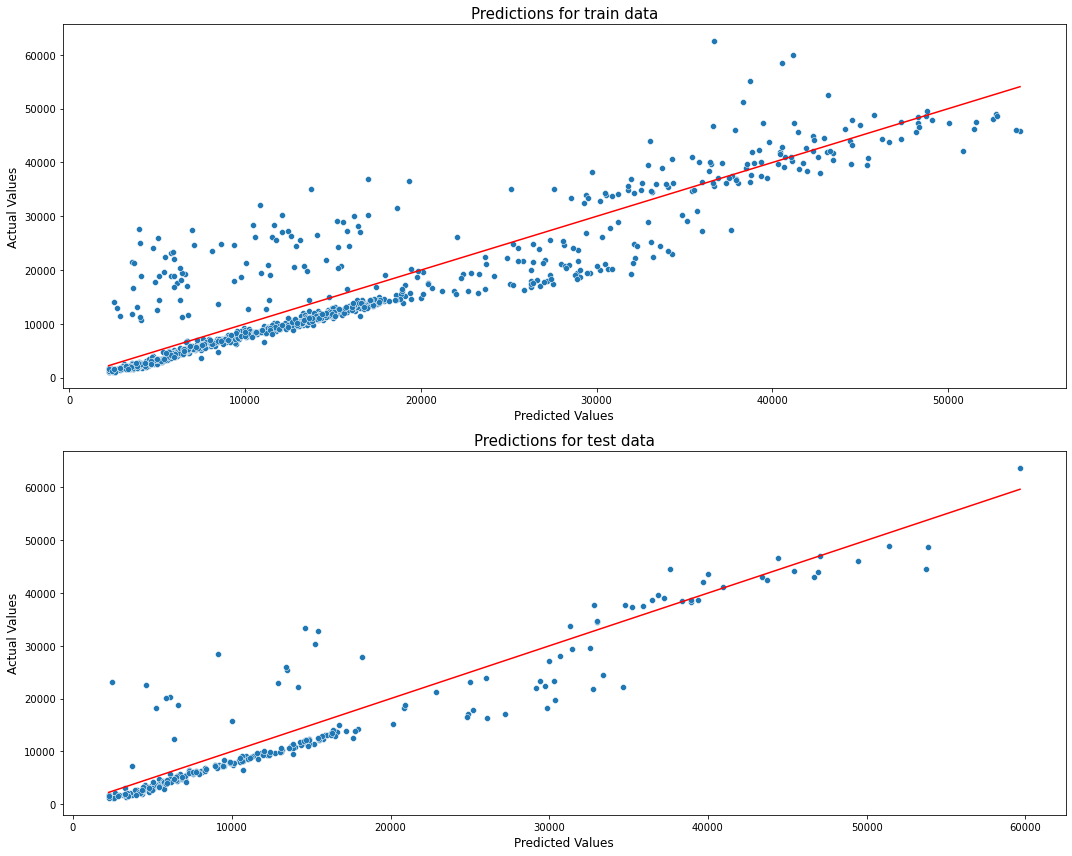

In [173]:
regression_plots(y_pred28, model28)

In [174]:
check_min_max(y_pred28)

Predicted values

max: 59656.50390625
min: 2243.9384765625

Actual values

max: 63770.42801
min: 1131.5066


In [193]:
# R2 decreased, while max stayed almost the same
# doubling the param count made the net perform worse
# I used the neuron count per layer to double the parms
# lets double the params by increasing the layer count 

In [217]:
# param count: 416,476
model29 = Sequential() 

model29.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model29.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model29.add(Dense(75, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model29.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model29.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model29.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model29.compile(loss=root_mean_squared_error, optimizer=Adam(0.00001),
             metrics=['mse', 'mae'])

In [218]:
history29 = model29.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 6s 450ms/step - loss: 17898.2656 - mse: 325472448.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 1s 43ms/step - loss: 17905.3535 - mse: 325472448.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 3/300
14/14 [==============================] - 1s 38ms/step - loss: 17913.1445 - mse: 325472448.0000 - mae: 13518.7188 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 4/300
14/14 [==============================] - 1s 43ms/step - loss: 17934.5449 - mse: 325472480.0000 - mae: 13518.7188 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 5/300
14/14 [==============================] - 1s 43ms/step - loss: 17939.1562 - mse: 325472448.0000 - mae: 13518.7188 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 6/300
14/14 [

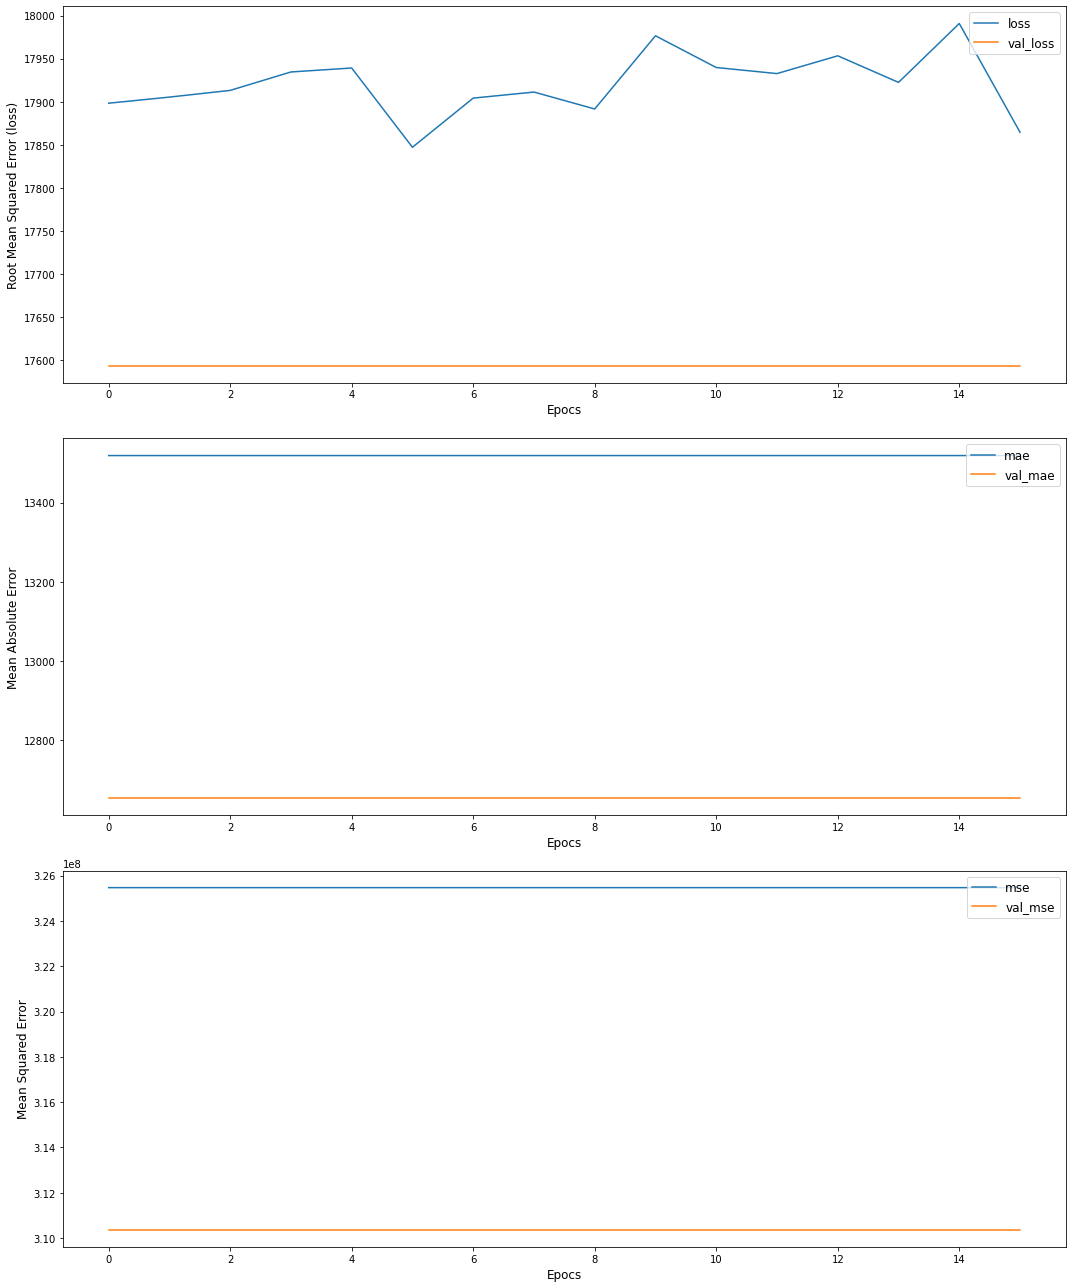

In [219]:
epoc_plots(history29)

In [220]:
y_pred29 = model29.predict(X_test)
r2_score(y_test, y_pred29) 

-1.0832761454931523

In [224]:
# model29 is not learning 
# I'm having a lot of trouble making my models learn
# I've tried [0.1, 0.01, 0.001, 0.0001, 0.00001] learning rates 
# I feel like I should study the Adam optimizer to debug the issue 

In [225]:
# before that, lets try regularizing the model with dropout layers

In [227]:
from tensorflow.keras.layers import Dropout

In [232]:
# # param count: 416476
# model29 = Sequential() 

# model29.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
# for i in range(20):
#     model29.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
#     model29.add(Dropout(0.2))
# for i in range(20):
#     model29.add(Dense(75, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
#     model29.add(Dropout(0.2))
# for i in range(30):
#     model29.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
#     model29.add(Dropout(0.2))
# for i in range(30):
#     model29.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
#     model29.add(Dropout(0.2))
# model29.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

# model29.compile(loss=root_mean_squared_error, optimizer=Adam(0.0001),
#              metrics=['mse', 'mae'])

In [235]:
# actually, regularization is for overfitted models
# this model is not learning at all
# ie underfitting 
# so maybe I'll not use dropouts as of yet
# PS I may or maynot have run the model before coming to this conclusion

In [236]:
# param count: 416,476
model29 = Sequential() 

model29.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model29.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model29.add(Dense(75, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model29.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model29.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model29.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model29.compile(loss=root_mean_squared_error, optimizer='sgd',
             metrics=['mse', 'mae'])

In [237]:
history29 = model29.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 3s 224ms/step - loss: 17870.5625 - mse: 325472448.0000 - mae: 13518.7158 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 0s 34ms/step - loss: 17950.5195 - mse: 325472480.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 3/300
14/14 [==============================] - 1s 39ms/step - loss: 17969.7363 - mse: 325472480.0000 - mae: 13518.7188 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 4/300
14/14 [==============================] - 1s 37ms/step - loss: 17854.2070 - mse: 325472480.0000 - mae: 13518.7158 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 5/300
14/14 [==============================] - 1s 54ms/step - loss: 17952.9219 - mse: 325472448.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 6/300
14/14 [

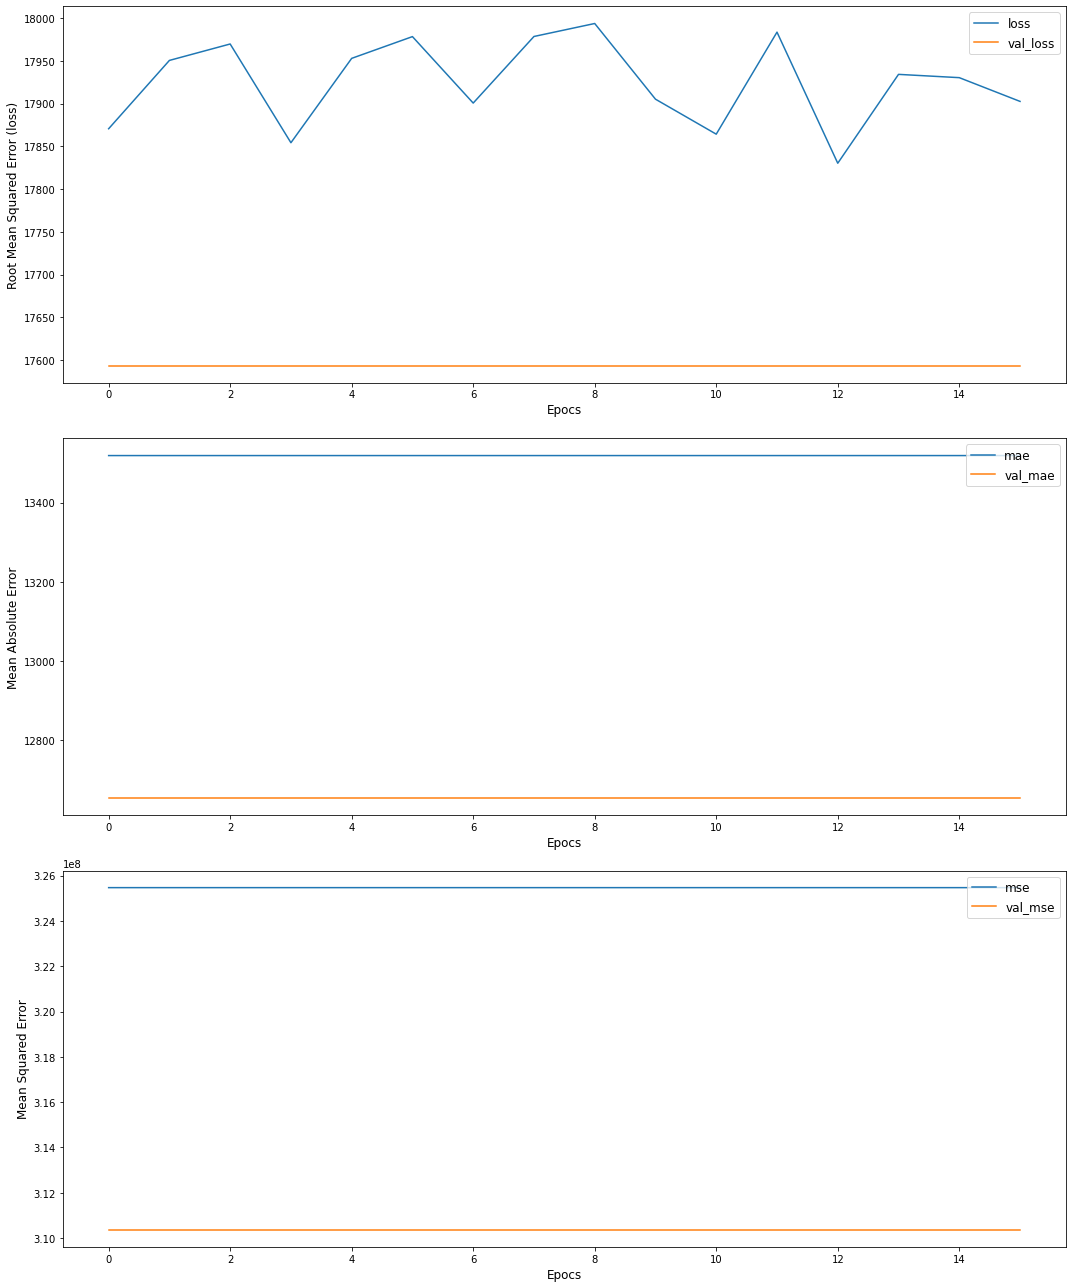

In [238]:
epoc_plots(history29)

In [240]:
# hmmmmm, SGD also isn't working 

In [241]:
from tensorflow.keras.optimizers import SGD

In [260]:
# param count: 416476
model29 = Sequential() 

model29.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model29.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model29.add(Dense(75, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model29.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model29.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model29.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model29.compile(loss=root_mean_squared_error, optimizer=SGD(0.0001, 0.9, nesterov=True),
             metrics=['mse', 'mae'])

In [261]:
history29 = model29.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 3s 182ms/step - loss: 17899.0762 - mse: 325472416.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 1s 38ms/step - loss: 17957.2266 - mse: 325472448.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 3/300
14/14 [==============================] - 1s 40ms/step - loss: 17970.6191 - mse: 325472480.0000 - mae: 13518.7158 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 4/300
14/14 [==============================] - 1s 39ms/step - loss: 17973.8477 - mse: 325472480.0000 - mae: 13518.7188 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 5/300
14/14 [==============================] - 1s 41ms/step - loss: 17962.0273 - mse: 325472480.0000 - mae: 13518.7158 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 6/300
14/14 [

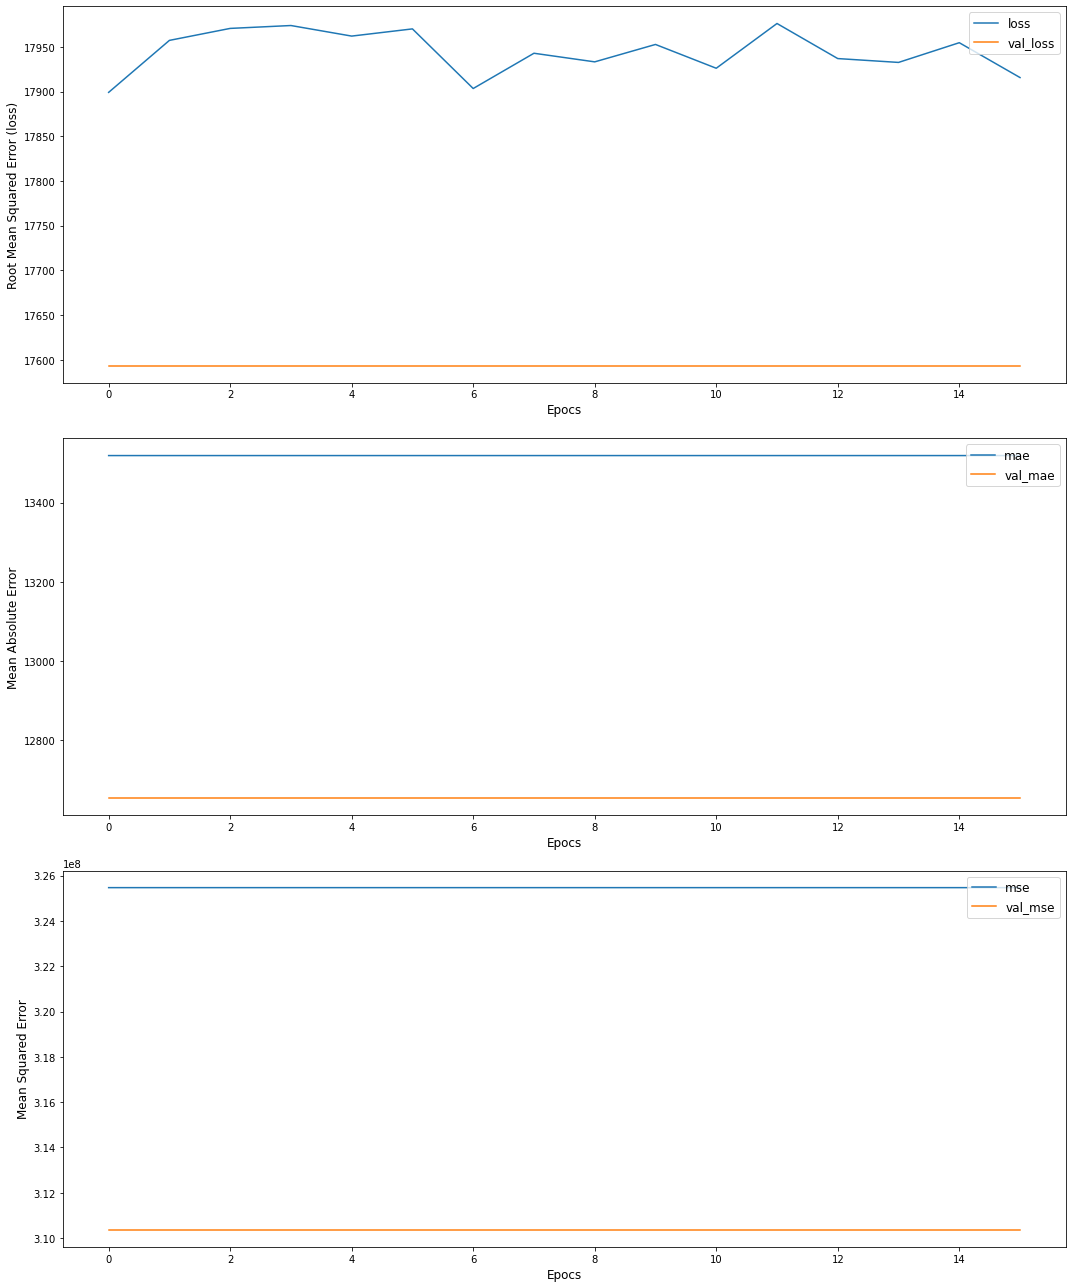

In [262]:
epoc_plots(history29)

In [263]:
# tuning the SGD hyperparameters also seems to not 
# make the net start to learn 
# might have to research more about the case 
# when model refuses to start learning 